## Code build and train ANN

   Resolving package versions...


  No Changes to `C:\Users\Pablo\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\Pablo\.julia\environments\v1.11\Manifest.toml`


   Resolving package versions...


  No Changes

 to `C:\Users\Pablo\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\Pablo\.julia\environments\v1.11\Manifest.toml`


   Resolving package versions...


  No Changes to `C:\Users\Pablo\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\Pablo\.julia\environments\v1.11\Manifest.toml`


   Resolving package versions...


  No Changes to `C:\Users\Pablo\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\Pablo\.julia\environments\v1.11\Manifest.toml`


Training with topology: 

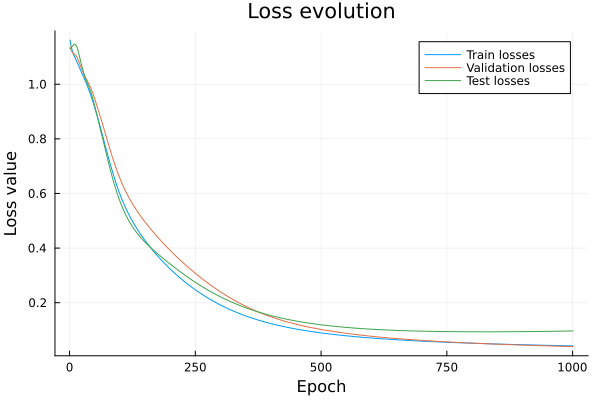

[5]
Training with topology: 

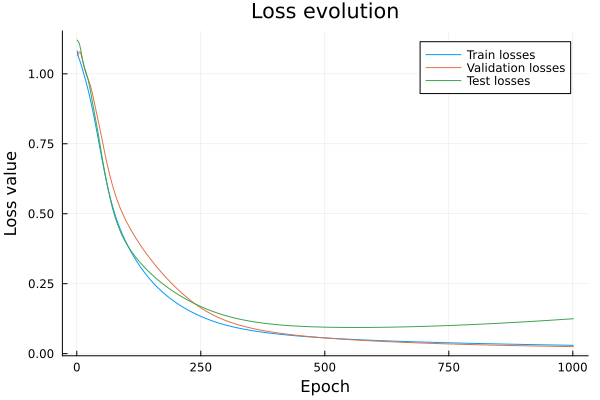

[10]


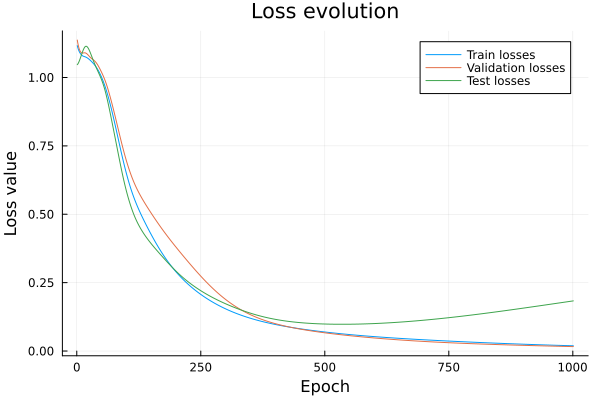

Training with topology: [4, 3]


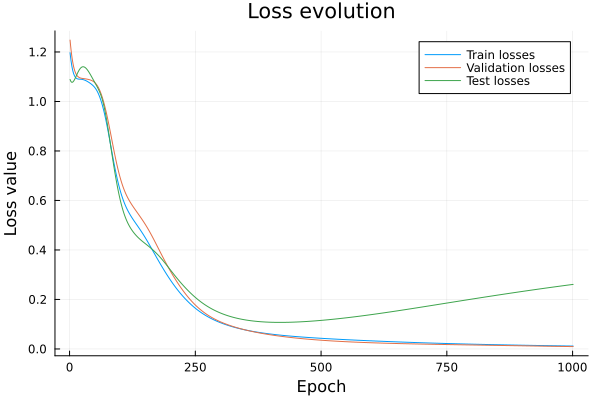

Training with topology: [8, 4]


In [10]:
include("./code/general/utils_general.jl")

include("./code/ann/build_train.jl")

using Pkg; Pkg.add("DelimitedFiles");    
using DelimitedFiles

using Pkg; Pkg.add("Plots")
using Plots; Pkg.add("PyPlot")



#Load iris dataset
dataset = readdlm("./data_test/iris.data",',');
datasetLength = size(dataset, 1)


(trainIndexes, validationIndexes, testIndexes) = holdOut(datasetLength, 0.2, 0.2)
(trainDataset, validationDataset, testDataset) = (dataset[trainIndexes, :], dataset[validationIndexes, :], dataset[testIndexes, :])


(trainInput, validationInput, testInput) = (convert(Array{Float32,2}, trainDataset[:,1:4]), convert(Array{Float32,2}, validationDataset[:,1:4]), convert(Array{Float32,2}, testDataset[:,1:4]))


classes = unique(trainDataset[:,5])
(trainOutput, validationOutput, testOutput) = (oneHotEncoding(trainDataset[:,5], classes), oneHotEncoding(validationDataset[:,5], classes), oneHotEncoding(testDataset[:,5], classes))


# Normalization 
normalizationParameters = calculateMinMaxNormalizationParameters(trainInput);
(trainInputNormalized, validationInputNormalized, testInputNormalized) = (normalizeMinMax(trainInput, normalizationParameters), normalizeMinMax(validationInput, normalizationParameters), normalizeMinMax(testInput, normalizationParameters))


#Define the parameters
topology = [4, 3]; 
learningRate = 0.01;
numMaxEpochs = 1000; 
topologies_to_try = [[5], [10], [4, 3], [8, 4]]
    
for topo in topologies_to_try
    println("Training with topology: ", topo)
    (ann, trainingLosses, validationLosses, testLosses) = trainClassANN(topo, (trainInputNormalized, trainOutput); validationDataset=(validationInputNormalized, validationOutput), testDataset=(testInputNormalized, testOutput), maxEpochs=numMaxEpochs, learningRate=learningRate);

  g =  plot(1:length(trainingLosses), 
    trainingLosses, 
    label="Train losses", 
    xlabel="Epoch", 
    ylabel="Loss value", 
    title="Loss evolution")

    if !isempty(validationLosses)
        plot!(1:length(validationLosses), validationLosses, label="Validation losses")
    end

    if !isempty(testLosses)
        plot!(1:length(testLosses), testLosses, label="Test losses")
    end

    display(g)
end;  


## Code metrics

In [11]:
include("./code/general/train_metrics.jl")

#Test boolean and boolean function
outputs=[0,0,1,1,0,1,1,0,0,0,1,1]
targets=[0,1,1,0,1,1,1,0,1,1,0,0]
printConfusionMatrix(convert(Array{Bool,1}, outputs), convert(Array{Bool,1}, targets));
println("\n\n")

#Test real and boolean
outputs=[0.4; 0.6; 1; 0.4;  0.55]
targets=[0;   1;   1; 1; 0]
printConfusionMatrix(convert(Array{Real,1}, outputs), convert(Array{Bool,1}, targets));


#Test array bool
testOutputs=Bool[0 0 1;1 0 0;0 1 0; 0 0 1; 0 0 1]
testTargets=Bool[0 0 1;0 1 0;0 1 0; 1 0 0; 1 0 0]
printConfusionMatrix(testOutputs, testTargets, weighted=false)
println("\n\n")

#Test array real and target bool
testRealOutputs=Real[0 0 0.7;0 0 0.6;0 1 0; 0 0 1; 0 0 1]
printConfusionMatrix(testRealOutputs, testTargets, weighted=false)
println("\n\n")

#Test array any 
result = confusionMatrix(testOutputs, testTargets)

testClasses=["dog", "cat", 3, :green, "dog", 3, "dog"]
testClassesTargets=["dog", "cat", 3, :green, "dog", 3, "dog"]
uniqueClasss=unique(testClasses)
printConfusionMatrix(testClasses, testClassesTargets, uniqueClasss)
println("\n\n")

#Test two classes 
result = confusionMatrix(testOutputs, testTargets)

testClasses=["dog"; "cat"]
testClassesTargets=["dog"; "cat"]
uniqueClasss=unique(testClasses)
printConfusionMatrix(testClasses, testClassesTargets, uniqueClasss)
println("\n\n")
println("hola")

Accuracy: 0.4166666666666667
Error rate: 0.5833333333333334
Sensitivity: 0.5
Specificty: 0.3333333333333333
Positive Predictive: 0.42857142857142855
Negative Predictive: 0.4
F-score: 0.4615384615384615
Confusion matrix: 

[2 4; 3 3]





Accuracy: 0.6
Error rate: 0.4
Sensitivity: 0.6666666666666666
Specificty: 0.5
Positive Predictive: 0.6666666666666666
Negative Predictive: 0.5
F-score: 0.6666666666666666
Confusion matrix: [1 1; 1 2]


Accuracy: 0.4
Error rate: 0.6
Sensitivity: 0.4444444444444444
Specificty: 0.75
Positive Predictive: 0.5
Negative Predictive: 0.7222222222222222
F-score: 0.38888888888888884
Confusion matrix: [0 0 2; 1 1 0; 0 0 1]



Accuracy: 

0.4
Error rate: 0.6
Sensitivity: 0.4166666666666667
Specificty: 0.5833333333333334
Positive Predictive: 0.5
Negative Predictive: 0.4166666666666667
F-score: 0.35555555555555557
Confusion matrix: [0 0 2; 0 1 1; 0 0 1]





Accuracy: 1.0
Error rate: 0.0
Sensitivity: 1.0
Specificty: 1.0
Positive Predictive: 1.0
Negative Predictive: 1.0
F-score: 1.0
Confusion matrix: [3 0 0 0; 0 1 0 0; 0 0 2 0; 0 0 0 1]





Accuracy: 1.0
Error rate: 0.0
Sensitivity: 1.0
Specificty: 1.0
Positive Predictive: 1.0
Negative Predictive: 1.0
F-score: 1.0
Confusion matrix: [1 0; 0 1]



hola


## BUILD AND TRAIN CROSS VALIDATION ANN

In [12]:
using Pkg; Pkg.add("DelimitedFiles");    
using DelimitedFiles

include("./code/general/utils_general.jl")
include("./code/ann/build_train.jl")


a=[false,true, false, true, true, false]


result = crossvalidation(5, 3)

println("Result", result)

b = crossvalidation(a, 3)
println("Cross validation AbstractArray{Bool, 1}", b)


a = Bool[0 1;1 0;1 0; 0 1;0 1]

bool2_indices = crossvalidation(a, 10)
println("Cross validation AbstractArray{Bool,2} ", bool2_indices)

unique(bool2_indices)


any_array = ['a', :b, 1, 'a']
one = oneHotEncoding(any_array)

println("Size ", size(any_array, 1), " lenght one " ,length(one), " size one ", size(one), "number columns one", size(one, 2))

any_indices = crossvalidation(any_array, 2)
println("Cross validation AbstractArray{<:Any,2} ", any_indices)


#HOW TO

b = [1 1 1 "perro"; 0 0 0 "gato"]


#Load iris dataset
dataset = readdlm("./data_test/iris.data",',');
datasetLength = size(dataset, 1)


(trainIndexes, testIndexes) = holdOut(datasetLength, 0.2)
(trainDataset, testDataset) = (dataset[trainIndexes, :], dataset[testIndexes, :])
(trainInput, testInput) = (convert(Array{Float32,2}, trainDataset[:,1:4]), convert(Array{Float32,2}, testDataset[:,1:4]))



classes = unique(trainDataset[:,5])
normalizationParameters = calculateMinMaxNormalizationParameters(trainInput);
(trainInputNormalized, testInputNormalized) = (normalizeMinMax(trainInput, normalizationParameters), normalizeMinMax(testInput, normalizationParameters))

topology = [4, 3]; 
crossValidationIndices = crossvalidation(trainDataset[:, 5], 8)


ANNCrossValidation(topology,
        (trainInputNormalized, trainDataset[:, 5]),
        crossValidationIndices)

   Resolving package versions...


  No Changes to `C:\Users\Pablo\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\Pablo\.julia\environments\v1.11\Manifest.toml`


   Resolving package versions...


  No Changes to `C:\Users\Pablo\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\Pablo\.julia\environments\v1.11\Manifest.toml`


Result[1, 3, 2, 1, 2]


Cross validation AbstractArray{Bool, 1}[3, 3, 1, 2, 1, 2]


Cross validation AbstractArray{Bool,2} [3, 1, 2, 1, 2]


Size 4 lenght one 12 size one (4, 3)number columns one3


Cross validation AbstractArray{<:Any,2} [2, 1, 1, 1]
Fold 

1 of 8


Epoch 0: loss: 1.318353


Epoch 1: loss: 1.296297
Epoch 2: loss: 1.2756432
Epoch 3: loss: 1.2563922
Epoch 4: loss: 1.238529
Epoch 5: loss: 1.2220256
Epoch 6: loss: 1.2068446
Epoch 7: loss: 1.1929443
Epoch 8: loss: 1.1802781
Epoch 9: loss: 1.168794
Epoch 10: loss: 1.1584345
Epoch 11: loss: 1.1491362
Epoch 12: loss: 1.1408324
Epoch 13: loss: 1.1334536
Epoch 14: loss: 1.1269293
Epoch 15: loss: 1.121188
Epoch 16: loss: 1.1161603
Epoch 17: loss: 1.1117786
Epoch 18: loss: 1.107978
Epoch 19: loss: 1.1046968
Epoch 20: loss: 1.1018773
Epoch 21: loss: 1.0994666
Epoch 22: loss: 1.0974147
Epoch 23: loss: 1.0956771
Epoch 24: loss: 1.0942123
Epoch 25: loss: 1.092983
Epoch 26: loss: 1.091956
Epoch 27: loss: 1.0911006
Epoch 28: loss: 1.09039
Epoch 29: loss: 1.0898002
Epoch 30: loss: 1.08931
Epoch 31: loss: 1.0889006
Epoch 32: loss: 1.0885552
Epoch 33: loss: 1.0882596
Epoch 34: loss: 1.088001
Epoch 35: loss: 1.0877687
Epoch 36: loss: 1.0875531
Epoch 37: loss: 1.0873466
Epoch 38: loss: 1.0871419
Epoch 39: loss: 1.0869342
Epoch 4

380: loss: 0.29203802
Epoch 381: loss: 0.2903524
Epoch 382: loss: 0.28867367
Epoch 383: loss: 0.28700203
Epoch 384: loss: 0.2853374
Epoch 385: loss: 0.28367993
Epoch 386: loss: 0.2820297
Epoch 387: loss: 0.28038672
Epoch 388: loss: 0.2787511
Epoch 389: loss: 0.27712294
Epoch 390: loss: 0.27550223
Epoch 391: loss: 0.2738891
Epoch 392: loss: 0.27228355
Epoch 393: loss: 0.2706856
Epoch 394: loss: 0.26909548
Epoch 395: loss: 0.26751307
Epoch 396: loss: 0.26593852
Epoch 397: loss: 0.26437178
Epoch 398: loss: 0.262813
Epoch 399: loss: 0.26126215
Epoch 400: loss: 0.25971934
Epoch 401: loss: 0.25818455
Epoch 402: loss: 0.2566578
Epoch 403: loss: 0.2551392
Epoch 404: loss: 0.25362876
Epoch 405: loss: 0.2521265
Epoch 406: loss: 0.2506324
Epoch 407: loss: 0.24914661
Epoch 408: loss: 0.24766904
Epoch 409: loss: 0.24619974
Epoch 410: loss: 0.24473882
Epoch 411: loss: 0.24328615
Epoch 412: loss: 0.24184187
Epoch 413: loss: 0.24040598
Epoch 414: loss: 0.2389784
Epoch 415: loss: 0.23755924
Epoch 416: 

Epoch 603: loss: 0.0941688
Epoch 604: loss: 0.09386219
Epoch 605: loss: 0.09355824
Epoch 606: loss: 0.09325692
Epoch 607: loss: 0.092958175
Epoch 608: loss: 0.09266203
Epoch 609: loss: 0.09236845
Epoch 610: loss: 0.09207737
Epoch 611: loss: 0.091788806
Epoch 612: loss: 0.091502704
Epoch 613: loss: 0.09121905
Epoch 614: loss: 0.09093785
Epoch 615: loss: 0.09065901
Epoch 616: loss: 0.09038256
Epoch 617: loss: 0.09010847
Epoch 618: loss: 0.08983668
Epoch 619: loss: 0.089567184
Epoch 620: loss: 0.08929997
Epoch 621: loss: 0.08903502
Epoch 622: loss: 0.088772304
Epoch 623: loss: 0.08851178
Epoch 624: loss: 0.08825341
Epoch 625: loss: 0.087997265
Epoch 626: loss: 0.087743215
Epoch 627: loss: 0.08749128
Epoch 628: loss: 0.08724144
Epoch 629: loss: 0.08699369
Epoch 630: loss: 0.08674797
Epoch 631: loss: 0.08650427
Epoch 632: loss: 0.08626261
Epoch 633: loss: 0.08602293
Epoch 634: loss: 0.0857852
Epoch 635: loss: 0.08554941
Epoch 636: loss: 0.085315555
Epoch 637: loss: 0.08508362
Epoch 638: los

: loss: 0.054365788
Epoch 965: loss: 0.054330144
Epoch 966: loss: 0.05429466
Epoch 967: loss: 0.0542593
Epoch 968: loss: 0.05422409
Epoch 969: loss: 0.054189034
Epoch 970: loss: 0.0541541
Epoch 971: loss: 0.054119322
Epoch 972: loss: 0.05408466
Epoch 973: loss: 0.054050155
Epoch 974: loss: 0.05401577
Epoch 975: loss: 0.053981546
Epoch 976: loss: 0.05394745
Epoch 977: loss: 0.05391351
Epoch 978: loss: 0.053879697
Epoch 979: loss: 0.053846
Epoch 980: loss: 0.05381244
Epoch 981: loss: 0.053779043
Epoch 982: loss: 0.05374574
Epoch 983: loss: 0.053712584
Epoch 984: loss: 0.053679567
Epoch 985: loss: 0.053646676
Epoch 986: loss: 0.053613923
Epoch 987: loss: 0.053581275
Epoch 988: loss: 0.053548753
Epoch 989: loss: 0.05351638
Epoch 990: loss: 0.053484127
Epoch 991: loss: 0.053452007
Epoch 992: loss: 0.053420007
Epoch 993: loss: 0.053388122
Epoch 994: loss: 0.053356383
Epoch 995: loss: 0.053324763
Epoch 996: loss: 0.053293236
Epoch 997: loss: 0.053261857
Epoch 998: loss: 0.053230617
Epoch 999:

0: loss: 1.2495683
Epoch 1: loss: 1.2349966
Epoch 2: loss: 1.2211777
Epoch 3: loss: 1.2081206
Epoch 4: loss: 1.195826
Epoch 5: loss: 1.1842859
Epoch 6: loss: 1.173488
Epoch 7: loss: 1.1634188
Epoch 8: loss: 1.154064
Epoch 9: loss: 1.1454082
Epoch 10: loss: 1.1374332
Epoch 11: loss: 1.1301198
Epoch 12: loss: 1.1234472
Epoch 13: loss: 1.1173917
Epoch 14: loss: 1.1119281
Epoch 15: loss: 1.1070281
Epoch 16: loss: 1.102661
Epoch 17: loss: 1.0987935
Epoch 18: loss: 1.0953898
Epoch 19: loss: 1.0924127
Epoch 20: loss: 1.0898229
Epoch 21: loss: 1.0875809
Epoch 22: loss: 1.0856477
Epoch 23: loss: 1.0839832
Epoch 24: loss: 1.0825492
Epoch 25: loss: 1.0813084
Epoch 26: loss: 1.0802248
Epoch 27: loss: 1.0792645
Epoch 28: loss: 1.0783956
Epoch 29: loss: 1.0775881
Epoch 30: loss: 1.0768148
Epoch 31: loss: 1.076051
Epoch 32: loss: 1.0752752
Epoch 33: loss: 1.0744678
Epoch 34: loss: 1.0736128
Epoch 35: loss: 1.0726968
Epoch 36: loss: 1.071709
Epoch 37: loss: 1.0706409
Epoch 38: loss: 1.069487
Epoch 39:


Epoch 377: loss: 0.15724428
Epoch 378: loss: 0.15628387
Epoch 379: loss: 0.15533353
Epoch 380: loss: 0.15439323
Epoch 381: loss: 0.15346287
Epoch 382: loss: 0.15254232
Epoch 383: loss: 0.1516315
Epoch 384: loss: 0.15073031
Epoch 385: loss: 0.14983867
Epoch 386: loss: 0.14895646
Epoch 387: loss: 0.14808363
Epoch 388: loss: 0.14722003
Epoch 389: loss: 0.14636561
Epoch 390: loss: 0.14552025
Epoch 391: loss: 0.14468388
Epoch 392: loss: 0.14385639
Epoch 393: loss: 0.1430377
Epoch 394: loss: 0.14222768
Epoch 395: loss: 0.1414263
Epoch 396: loss: 0.1406334
Epoch 397: loss: 0.13984896
Epoch 398: loss: 0.13907282
Epoch 399: loss: 0.13830495
Epoch 400: loss: 0.1375452
Epoch 401: loss: 0.13679355
Epoch 402: loss: 0.13604987
Epoch 403: loss: 0.13531403
Epoch 404: loss: 0.13458605
Epoch 405: loss: 0.13386574
Epoch 406: loss: 0.1331531
Epoch 407: loss: 0.13244796
Epoch 408: loss: 0.1317503
Epoch 409: loss: 0.13105997
Epoch 410: loss: 0.13037696
Epoch 411: loss: 0.12970114
Epoch 412: loss: 0.1290324

Epoch 528: loss: 0.083241686
Epoch 529: loss: 0.0830198
Epoch 530: loss: 0.082799725
Epoch 531: loss: 0.08258143
Epoch 532: loss: 0.08236488
Epoch 533: loss: 0.082150094
Epoch 534: loss: 0.081937
Epoch 535: loss: 0.08172561
Epoch 536: loss: 0.08151589
Epoch 537: loss: 0.08130786
Epoch 538: loss: 0.081101485
Epoch 539: loss: 0.080896735
Epoch 540: loss: 0.08069359
Epoch 541: loss: 0.08049202
Epoch 542: loss: 0.08029209
Epoch 543: loss: 0.08009369
Epoch 544: loss: 0.079896815
Epoch 545: loss: 0.079701506
Epoch 546: loss: 0.07950771
Epoch 547: loss: 0.07931539
Epoch 548: loss: 0.079124585
Epoch 549: loss: 0.07893523
Epoch 550: loss: 0.078747325
Epoch 551: loss: 0.07856091
Epoch 552: loss: 0.07837589
Epoch 553: loss: 0.078192264
Epoch 554: loss: 0.07801007
Epoch 555: loss: 0.07782926
Epoch 556: loss: 0.07764982
Epoch 557: loss: 0.077471696
Epoch 558: loss: 0.07729494
Epoch 559: loss: 0.07711952
Epoch 560: loss: 0.076945424
Epoch 561: loss: 0.076772615
Epoch 562: loss: 0.076601095
Epoch 563

0.052756436
Epoch 889: loss: 0.05272744
Epoch 890: loss: 0.05269852
Epoch 891: loss: 0.05266973
Epoch 892: loss: 0.05264102
Epoch 893: loss: 0.052612476
Epoch 894: loss: 0.052584026
Epoch 895: loss: 0.05255568
Epoch 896: loss: 0.05252742
Epoch 897: loss: 0.0524993
Epoch 898: loss: 0.052471273
Epoch 899: loss: 0.05244335
Epoch 900: loss: 0.052415546
Epoch 901: loss: 0.05238786
Epoch 902: loss: 0.052360244
Epoch 903: loss: 0.05233278
Epoch 904: loss: 0.052305397
Epoch 905: loss: 0.052278087
Epoch 906: loss: 0.052250937
Epoch 907: loss: 0.052223846
Epoch 908: loss: 0.052196886
Epoch 909: loss: 0.052170012
Epoch 910: loss: 0.05214327
Epoch 911: loss: 0.052116558
Epoch 912: loss: 0.05209001
Epoch 913: loss: 0.05206352
Epoch 914: loss: 0.052037187
Epoch 915: loss: 0.052010912
Epoch 916: loss: 0.051984765
Epoch 917: loss: 0.051958676
Epoch 918: loss: 0.0519327
Epoch 919: loss: 0.05190681
Epoch 920: loss: 0.051881038
Epoch 921: loss: 0.05185534
Epoch 922: loss: 0.051829755
Epoch 923: loss: 0.0


Epoch 77: loss: 0.7811003
Epoch 78: loss: 0.77011555
Epoch 79: loss: 0.7591933
Epoch 80: loss: 0.7483593
Epoch 81: loss: 0.73763794
Epoch 82: loss: 0.7270532
Epoch 83: loss: 0.716627
Epoch 84: loss: 0.7063793
Epoch 85: loss: 0.69632953
Epoch 86: loss: 0.68649423
Epoch 87: loss: 0.67688805
Epoch 88: loss: 0.6675242
Epoch 89: loss: 0.65841335
Epoch 90: loss: 0.64956474
Epoch 91: loss: 0.6409852
Epoch 92: loss: 0.63267994
Epoch 93: loss: 0.624652
Epoch 94: loss: 0.6169033
Epoch 95: loss: 0.6094334
Epoch 96: loss: 0.60224074
Epoch 97: loss: 0.5953221
Epoch 98: loss: 0.588673
Epoch 99: loss: 0.58228815
Epoch 100: loss: 0.5761607
Epoch 101: loss: 0.57028353
Epoch 102: loss: 0.5646484
Epoch 103: loss: 0.5592464
Epoch 104: loss: 0.5540685
Epoch 105: loss: 0.54910505
Epoch 106: loss: 0.54434633
Epoch 107: loss: 0.539782
Epoch 108: loss: 0.5354022
Epoch 109: loss: 0.5311967
Epoch 110: loss: 0.5271555
Epoch 111: loss: 0.52326876
Epoch 112: loss: 0.51952666
Epoch 113: loss: 0.51591974
Epoch 114: 

Epoch 446: loss: 0.07162992
Epoch 447: loss: 0.07144851
Epoch 448: loss: 0.07126879
Epoch 449: loss: 0.07109068
Epoch 450: loss: 0.07091425
Epoch 451: loss: 0.07073948
Epoch 452: loss: 0.070566274
Epoch 453: loss: 0.07039469
Epoch 454: loss: 0.07022463
Epoch 455: loss: 0.07005611
Epoch 456: loss: 0.069889136
Epoch 457: loss: 0.06972369
Epoch 458: loss: 0.069559716
Epoch 459: loss: 0.06939721
Epoch 460: loss: 0.06923617
Epoch 461: loss: 0.06907654
Epoch 462: loss: 0.06891834
Epoch 463: loss: 0.06876156
Epoch 464: loss: 0.06860613
Epoch 465: loss: 0.06845209
Epoch 466: loss: 0.068299405
Epoch 467: loss: 0.06814806
Epoch 468: loss: 0.06799802
Epoch 469: loss: 0.06784927
Epoch 470: loss: 0.067701824
Epoch 471: loss: 0.06755567
Epoch 472: loss: 0.06741074
Epoch 473: loss: 0.06726709
Epoch 474: loss: 0.06712465
Epoch 475: loss: 0.06698342
Epoch 476: loss: 0.06684339
Epoch 477: loss: 0.066704564
Epoch 478: loss: 0.06656689
Epoch 479: loss: 0.06643038
Epoch 480: loss: 0.06629503
Epoch 481: los

564: loss: 0.057983693
Epoch 565: loss: 0.057911865
Epoch 566: loss: 0.057840493
Epoch 567: loss: 0.057769604
Epoch 568: loss: 0.057699185
Epoch 569: loss: 0.057629205
Epoch 570: loss: 0.05755969
Epoch 571: loss: 0.05749063
Epoch 572: loss: 0.057422027
Epoch 573: loss: 0.057353817
Epoch 574: loss: 0.057286076
Epoch 575: loss: 0.057218798
Epoch 576: loss: 0.057151914
Epoch 577: loss: 0.05708548
Epoch 578: loss: 0.057019472
Epoch 579: loss: 0.05695387
Epoch 580: loss: 0.056888685
Epoch 581: loss: 0.056823924
Epoch 582: loss: 0.05675954
Epoch 583: loss: 0.056695607
Epoch 584: loss: 0.056632046
Epoch 585: loss: 0.056568895
Epoch 586: loss: 0.056506116
Epoch 587: loss: 0.056443755
Epoch 588: loss: 0.05638178
Epoch 589: loss: 0.05632019
Epoch 590: loss: 0.05625897
Epoch 591: loss: 0.05619812
Epoch 592: loss: 0.05613766
Epoch 593: loss: 0.056077573
Epoch 594: loss: 0.05601785
Epoch 595: loss: 0.05595849
Epoch 596: loss: 0.05589948
Epoch 597: loss: 0.055840842
Epoch 598: loss: 0.05578258
Epoch

0.046424255
Epoch 923: loss: 0.04641016
Epoch 924: loss: 0.046396084
Epoch 925: loss: 0.046382073
Epoch 926: loss: 0.04636808
Epoch 927: loss: 0.04635413
Epoch 928: loss: 0.04634025
Epoch 929: loss: 0.046326406
Epoch 930: loss: 0.046312608
Epoch 931: loss: 0.04629886
Epoch 932: loss: 0.04628512
Epoch 933: loss: 0.046271447
Epoch 934: loss: 0.046257846
Epoch 935: loss: 0.046244223
Epoch 936: loss: 0.046230678
Epoch 937: loss: 0.04621721
Epoch 938: loss: 0.04620374
Epoch 939: loss: 0.04619034
Epoch 940: loss: 0.046176944
Epoch 941: loss: 0.04616362
Epoch 942: loss: 0.046150308
Epoch 943: loss: 0.04613709
Epoch 944: loss: 0.046123877
Epoch 945: loss: 0.046110705
Epoch 946: loss: 0.04609758
Epoch 947: loss: 0.046084497
Epoch 948: loss: 0.04607143
Epoch 949: loss: 0.04605844
Epoch 950: loss: 0.04604548
Epoch 951: loss: 0.046032567
Epoch 952: loss: 0.046019655
Epoch 953: loss: 0.046006825
Epoch 954: loss: 0.04599401
Epoch 955: loss: 0.045981236
Epoch 956: loss: 0.045968506
Epoch 957: loss: 0

Epoch 38: loss: 1.0881873
Epoch 39: loss: 1.0877985
Epoch 40: loss: 1.0874065
Epoch 41: loss: 1.0870051
Epoch 42: loss: 1.0865887
Epoch 43: loss: 1.0861522
Epoch 44: loss: 1.0856915
Epoch 45: loss: 1.085203
Epoch 46: loss: 1.0846841
Epoch 47: loss: 1.084132
Epoch 48: loss: 1.0835443
Epoch 49: loss: 1.0829194
Epoch 50: loss: 1.082255
Epoch 51: loss: 1.0815498
Epoch 52: loss: 1.0808015
Epoch 53: loss: 1.0800087
Epoch 54: loss: 1.0791693
Epoch 55: loss: 1.0782813
Epoch 56: loss: 1.0773427
Epoch 57: loss: 1.0763516
Epoch 58: loss: 1.0753053
Epoch 59: loss: 1.0742024
Epoch 60: loss: 1.0730399
Epoch 61: loss: 1.0718157
Epoch 62: loss: 1.0705276
Epoch 63: loss: 1.0691727
Epoch 64: loss: 1.067749
Epoch 65: loss: 1.0662535
Epoch 66: loss: 1.0646838
Epoch 67: loss: 1.0630366
Epoch 68: loss: 1.061309
Epoch 69: loss: 1.0594984
Epoch 70: loss: 1.0576011
Epoch 71: loss: 1.055614
Epoch 72: loss: 1.053534
Epoch 73: loss: 1.0513575
Epoch 74: loss: 1.049081
Epoch 75: loss: 1.0467013
Epoch 76: loss: 1.04

342: loss: 0.20657621
Epoch 343: loss: 0.20533897
Epoch 344: loss: 0.2041092
Epoch 345: loss: 0.2028869
Epoch 346: loss: 0.20167214
Epoch 347: loss: 0.2004649
Epoch 348: loss: 0.19926527
Epoch 349: loss: 0.19807322
Epoch 350: loss: 0.19688885
Epoch 351: loss: 0.19571202
Epoch 352: loss: 0.19454294
Epoch 353: loss: 0.19338147
Epoch 354: loss: 0.19222769
Epoch 355: loss: 0.19108161
Epoch 356: loss: 0.1899433
Epoch 357: loss: 0.18881264
Epoch 358: loss: 0.18768975
Epoch 359: loss: 0.18657456
Epoch 360: loss: 0.1854671
Epoch 361: loss: 0.18436739
Epoch 362: loss: 0.1832754
Epoch 363: loss: 0.18219116
Epoch 364: loss: 0.18111469
Epoch 365: loss: 0.1800459
Epoch 366: loss: 0.17898487
Epoch 367: loss: 0.17793155
Epoch 368: loss: 0.17688595
Epoch 369: loss: 0.17584807
Epoch 370: loss: 0.17481782
Epoch 371: loss: 0.1737953
Epoch 372: loss: 0.17278045
Epoch 373: loss: 0.17177327
Epoch 374: loss: 0.17077368
Epoch 375: loss: 0.16978176
Epoch 376: loss: 0.16879746
Epoch 377: loss: 0.16782072
Epoch 

627: loss: 0.068052836
Epoch 628: loss: 0.06792982
Epoch 629: loss: 0.06780763
Epoch 630: loss: 0.06768626
Epoch 631: loss: 0.06756569
Epoch 632: loss: 0.06744595
Epoch 633: loss: 0.06732699
Epoch 634: loss: 0.06720884
Epoch 635: loss: 0.067091495
Epoch 636: loss: 0.066974886
Epoch 637: loss: 0.06685906
Epoch 638: loss: 0.06674399
Epoch 639: loss: 0.06662969
Epoch 640: loss: 0.06651616
Epoch 641: loss: 0.06640334
Epoch 642: loss: 0.0662913
Epoch 643: loss: 0.06617996
Epoch 644: loss: 0.066069365
Epoch 645: loss: 0.06595949
Epoch 646: loss: 0.06585031
Epoch 647: loss: 0.06574189
Epoch 648: loss: 0.06563411
Epoch 649: loss: 0.06552707
Epoch 650: loss: 0.065420695
Epoch 651: loss: 0.06531501
Epoch 652: loss: 0.06521003
Epoch 653: loss: 0.06510569
Epoch 654: loss: 0.06500205
Epoch 655: loss: 0.06489905
Epoch 656: loss: 0.0647967
Epoch 657: loss: 0.06469503
Epoch 658: loss: 0.06459398
Epoch 659: loss: 0.064493604
Epoch 660: loss: 0.06439385
Epoch 661: loss: 0.06429471
Epoch 662: loss: 0.064


Epoch 987: loss: 0.049285054
Epoch 988: loss: 0.049265556
Epoch 989: loss: 0.049246147
Epoch 990: loss: 0.0492268
Epoch 991: loss: 0.04920755
Epoch 992: loss: 0.04918833
Epoch 993: loss: 0.04916924
Epoch 994: loss: 0.04915021
Epoch 995: loss: 0.049131252
Epoch 996: loss: 0.049112353
Epoch 997: loss: 0.04909355
Epoch 998: loss: 0.04907482
Epoch 999: loss: 0.049056165
Epoch 1000: loss: 0.049037553
Epoch 0: loss: 1.2348018
Epoch 1: loss: 1.2183523
Epoch 2: loss: 1.2032758
Epoch 3: loss: 1.1895324
Epoch 4: loss: 1.17708
Epoch 5: loss: 1.165866
Epoch 6: loss: 1.1558268
Epoch 7: loss: 1.1468915
Epoch 8: loss: 1.1389848
Epoch 9: loss: 1.1320275
Epoch 10: loss: 1.1259396
Epoch 11: loss: 1.1206399
Epoch 12: loss: 1.1160489
Epoch 13: loss: 1.1120894
Epoch 14: loss: 1.1086882
Epoch 15: loss: 1.1057757
Epoch 16: loss: 1.1032875
Epoch 17: loss: 1.1011646
Epoch 18: loss: 1.0993537
Epoch 19: loss: 1.0978067
Epoch 20: loss: 1.0964812
Epoch 21: loss: 1.0953395
Epoch 22: loss: 1.0943494
Epoch 23: loss:

60: loss: 1.0509026
Epoch 61: loss: 1.0481808
Epoch 62: loss: 1.0453105
Epoch 63: loss: 1.0422851
Epoch 64: loss: 1.0390983
Epoch 65: loss: 1.0357429
Epoch 66: loss: 1.0322129
Epoch 67: loss: 1.028502
Epoch 68: loss: 1.0246041
Epoch 69: loss: 1.0205135
Epoch 70: loss: 1.0162255
Epoch 71: loss: 1.0117347
Epoch 72: loss: 1.0070378
Epoch 73: loss: 1.0021307
Epoch 74: loss: 0.9970115
Epoch 75: loss: 0.9916783
Epoch 76: loss: 0.9861306
Epoch 77: loss: 0.98036855
Epoch 78: loss: 0.9743942
Epoch 79: loss: 0.96820986
Epoch 80: loss: 0.9618195
Epoch 81: loss: 0.9552282
Epoch 82: loss: 0.94844246
Epoch 83: loss: 0.9414693
Epoch 84: loss: 0.9343179
Epoch 85: loss: 0.9269971
Epoch 86: loss: 0.91951835
Epoch 87: loss: 0.9118926
Epoch 88: loss: 0.9041327
Epoch 89: loss: 0.8962514
Epoch 90: loss: 0.88826275
Epoch 91: loss: 0.8801808
Epoch 92: loss: 0.8720202
Epoch 93: loss: 0.863796
Epoch 94: loss: 0.8555234
Epoch 95: loss: 0.84721744
Epoch 96: loss: 0.83889306
Epoch 97: loss: 0.83056545
Epoch 98: lo

0.123238154
Epoch 433: loss: 0.12253317
Epoch 434: loss: 0.12183617
Epoch 435: loss: 0.12114704
Epoch 436: loss: 0.12046572
Epoch 437: loss: 0.11979212
Epoch 438: loss: 0.119126156
Epoch 439: loss: 0.11846773
Epoch 440: loss: 0.11781677
Epoch 441: loss: 0.117173195
Epoch 442: loss: 0.11653692
Epoch 443: loss: 0.115907855
Epoch 444: loss: 0.11528591
Epoch 445: loss: 0.11467103
Epoch 446: loss: 0.1140631
Epoch 447: loss: 0.11346206
Epoch 448: loss: 0.112867825
Epoch 449: loss: 0.11228032
Epoch 450: loss: 0.111699425
Epoch 451: loss: 0.11112514
Epoch 452: loss: 0.110557325
Epoch 453: loss: 0.10999595
Epoch 454: loss: 0.10944091
Epoch 455: loss: 0.10889209
Epoch 456: loss: 0.10834945
Epoch 457: loss: 0.10781299
Epoch 458: loss: 0.10728251
Epoch 459: loss: 0.106758036
Epoch 460: loss: 0.10623943
Epoch 461: loss: 0.10572663
Epoch 462: loss: 0.105219595
Epoch 463: loss: 0.10471822
Epoch 464: loss: 0.104222484
Epoch 465: loss: 0.10373226
Epoch 466: loss: 0.10324751
Epoch 467: loss: 0.10276815


0.066976376
Epoch 611: loss: 0.06685398
Epoch 612: loss: 0.06673251
Epoch 613: loss: 0.066611975
Epoch 614: loss: 0.06649237
Epoch 615: loss: 0.0663737
Epoch 616: loss: 0.066255875
Epoch 617: loss: 0.06613899
Epoch 618: loss: 0.06602299
Epoch 619: loss: 0.06590784
Epoch 620: loss: 0.06579358
Epoch 621: loss: 0.065680176
Epoch 622: loss: 0.06556762
Epoch 623: loss: 0.0654559
Epoch 624: loss: 0.06534503
Epoch 625: loss: 0.06523495
Epoch 626: loss: 0.06512571
Epoch 627: loss: 0.06501727
Epoch 628: loss: 0.06490963
Epoch 629: loss: 0.06480279
Epoch 630: loss: 0.064696744
Epoch 631: loss: 0.06459147
Epoch 632: loss: 0.06448695
Epoch 633: loss: 0.064383194
Epoch 634: loss: 0.06428021
Epoch 635: loss: 0.06417795
Epoch 636: loss: 0.06407645
Epoch 637: loss: 0.06397568
Epoch 638: loss: 0.06387561
Epoch 639: loss: 0.063776284
Epoch 640: loss: 0.06367765
Epoch 641: loss: 0.063579746
Epoch 642: loss: 0.06348253
Epoch 643: loss: 0.063386016
Epoch 644: loss: 0.06329015
Epoch 645: loss: 0.063195
Epoc

: loss: 0.04948823
Epoch 970: loss: 0.049470566
Epoch 971: loss: 0.049453016
Epoch 972: loss: 0.049435522
Epoch 973: loss: 0.04941809
Epoch 974: loss: 0.04940076
Epoch 975: loss: 0.049383454
Epoch 976: loss: 0.04936621
Epoch 977: loss: 0.049349032
Epoch 978: loss: 0.049331963
Epoch 979: loss: 0.04931489
Epoch 980: loss: 0.049297933
Epoch 981: loss: 0.049281035
Epoch 982: loss: 0.049264196
Epoch 983: loss: 0.049247388
Epoch 984: loss: 0.049230654
Epoch 985: loss: 0.04921402
Epoch 986: loss: 0.04919742
Epoch 987: loss: 0.0491809
Epoch 988: loss: 0.04916444
Epoch 989: loss: 0.04914802
Epoch 990: loss: 0.049131658
Epoch 991: loss: 0.049115386
Epoch 992: loss: 0.049099144
Epoch 993: loss: 0.04908299
Epoch 994: loss: 0.049066894
Epoch 995: loss: 0.049050823
Epoch 996: loss: 0.049034838
Epoch 997: loss: 0.049018905
Epoch 998: loss: 0.049003046
Epoch 999: loss: 0.048987266
Epoch 1000: loss: 0.04897151
Epoch 0: loss: 1.256882
Epoch 1: loss: 1.2408359
Epoch 2: loss: 1.2260696
Epoch 3: loss: 1.21

122: loss: 0.77499413
Epoch 123: loss: 0.7659484
Epoch 124: loss: 0.75700915
Epoch 125: loss: 0.74818987
Epoch 126: loss: 0.73950297
Epoch 127: loss: 0.7309598
Epoch 128: loss: 0.72257036
Epoch 129: loss: 0.71434397
Epoch 130: loss: 0.7062882
Epoch 131: loss: 0.69841
Epoch 132: loss: 0.6907148
Epoch 133: loss: 0.6832074
Epoch 134: loss: 0.67589134
Epoch 135: loss: 0.66876924
Epoch 136: loss: 0.66184276
Epoch 137: loss: 0.6551129
Epoch 138: loss: 0.64857966
Epoch 139: loss: 0.6422422
Epoch 140: loss: 0.6360993
Epoch 141: loss: 0.63014895
Epoch 142: loss: 0.62438846
Epoch 143: loss: 0.61881477
Epoch 144: loss: 0.6134242
Epoch 145: loss: 0.60821277
Epoch 146: loss: 0.60317624
Epoch 147: loss: 0.5983099
Epoch 148: loss: 0.59360886
Epoch 149: loss: 0.5890681
Epoch 150: loss: 0.58468235
Epoch 151: loss: 0.5804463
Epoch 152: loss: 0.5763545
Epoch 153: loss: 0.5724016
Epoch 154: loss: 0.568582
Epoch 155: loss: 0.5648903
Epoch 156: loss: 0.5613211
Epoch 157: loss: 0.5578691
Epoch 158: loss: 0.5

491: loss: 0.0980823
Epoch 492: loss: 0.097780146
Epoch 493: loss: 0.097480446
Epoch 494: loss: 0.097183116
Epoch 495: loss: 0.09688819
Epoch 496: loss: 0.09659561
Epoch 497: loss: 0.09630532
Epoch 498: loss: 0.096017346
Epoch 499: loss: 0.095731646
Epoch 500: loss: 0.09544817
Epoch 501: loss: 0.09516697
Epoch 502: loss: 0.09488793
Epoch 503: loss: 0.09461106
Epoch 504: loss: 0.0943364
Epoch 505: loss: 0.09406385
Epoch 506: loss: 0.09379343
Epoch 507: loss: 0.09352506
Epoch 508: loss: 0.09325878
Epoch 509: loss: 0.09299454
Epoch 510: loss: 0.09273234
Epoch 511: loss: 0.09247213
Epoch 512: loss: 0.092213914
Epoch 513: loss: 0.09195768
Epoch 514: loss: 0.09170334
Epoch 515: loss: 0.091450974
Epoch 516: loss: 0.0912005
Epoch 517: loss: 0.090951934
Epoch 518: loss: 0.09070519
Epoch 519: loss: 0.09046034
Epoch 520: loss: 0.0902173
Epoch 521: loss: 0.08997606
Epoch 522: loss: 0.08973665
Epoch 523: loss: 0.08949898
Epoch 524: loss: 0.089263074
Epoch 525: loss: 0.08902892
Epoch 526: loss: 0.08

Epoch 574: loss: 0.07937448
Epoch 575: loss: 0.07920908
Epoch 576: loss: 0.07904478
Epoch 577: loss: 0.07888152
Epoch 578: loss: 0.078719325
Epoch 579: loss: 0.0785582
Epoch 580: loss: 0.07839808
Epoch 581: loss: 0.07823903
Epoch 582: loss: 0.078080975
Epoch 583: loss: 0.07792396
Epoch 584: loss: 0.07776792
Epoch 585: loss: 0.07761288
Epoch 586: loss: 0.077458814
Epoch 587: loss: 0.07730576
Epoch 588: loss: 0.077153645
Epoch 589: loss: 0.07700249
Epoch 590: loss: 0.07685231
Epoch 591: loss: 0.076703064
Epoch 592: loss: 0.07655478
Epoch 593: loss: 0.076407395
Epoch 594: loss: 0.07626092
Epoch 595: loss: 0.07611536
Epoch 596: loss: 0.07597073
Epoch 597: loss: 0.07582699
Epoch 598: loss: 0.07568414
Epoch 599: loss: 0.07554217
Epoch 600: loss: 0.075401075
Epoch 601: loss: 0.07526083
Epoch 602: loss: 0.07512149
Epoch 603: loss: 0.07498295
Epoch 604: loss: 0.0748453
Epoch 605: loss: 0.074708454
Epoch 606: loss: 0.074572474
Epoch 607: loss: 0.074437305
Epoch 608: loss: 0.07430296
Epoch 609: l

934: loss: 0.053128935
Epoch 935: loss: 0.05309946
Epoch 936: loss: 0.053070113
Epoch 937: loss: 0.05304083
Epoch 938: loss: 0.053011697
Epoch 939: loss: 0.052982632
Epoch 940: loss: 0.052953683
Epoch 941: loss: 0.05292487
Epoch 942: loss: 0.05289615
Epoch 943: loss: 0.05286749
Epoch 944: loss: 0.052838977
Epoch 945: loss: 0.052810535
Epoch 946: loss: 0.052782223
Epoch 947: loss: 0.05275402
Epoch 948: loss: 0.052725885
Epoch 949: loss: 0.05269788
Epoch 950: loss: 0.052669976
Epoch 951: loss: 0.052642148
Epoch 952: loss: 0.052614443
Epoch 953: loss: 0.05258682
Epoch 954: loss: 0.052559312
Epoch 955: loss: 0.052531864
Epoch 956: loss: 0.052504558
Epoch 957: loss: 0.052477334
Epoch 958: loss: 0.052450206
Epoch 959: loss: 0.052423213
Epoch 960: loss: 0.052396238
Epoch 961: loss: 0.05236941
Epoch 962: loss: 0.052342657
Epoch 963: loss: 0.052316006
Epoch 964: loss: 0.052289452
Epoch 965: loss: 0.052262988
Epoch 966: loss: 0.052236624
Epoch 967: loss: 0.052210357
Epoch 968: loss: 0.052184146


10: loss: 1.0913856
Epoch 11: loss: 1.0910561
Epoch 12: loss: 1.0908756
Epoch 13: loss: 1.0907613
Epoch 14: loss: 1.0906434
Epoch 15: loss: 1.0904678
Epoch 16: loss: 1.0901983
Epoch 17: loss: 1.0898154
Epoch 18: loss: 1.089314
Epoch 19: loss: 1.0886992
Epoch 20: loss: 1.0879843
Epoch 21: loss: 1.087186
Epoch 22: loss: 1.0863217
Epoch 23: loss: 1.0854084
Epoch 24: loss: 1.0844601
Epoch 25: loss: 1.0834879
Epoch 26: loss: 1.0824975
Epoch 27: loss: 1.0814918
Epoch 28: loss: 1.0804689
Epoch 29: loss: 1.0794232
Epoch 30: loss: 1.078347
Epoch 31: loss: 1.077229
Epoch 32: loss: 1.0760572
Epoch 33: loss: 1.0748188
Epoch 34: loss: 1.073501
Epoch 35: loss: 1.0720918
Epoch 36: loss: 1.0705802
Epoch 37: loss: 1.0689565
Epoch 38: loss: 1.067212
Epoch 39: loss: 1.0653389
Epoch 40: loss: 1.0633303
Epoch 41: loss: 1.0611796
Epoch 42: loss: 1.05888
Epoch 43: loss: 1.056424
Epoch 44: loss: 1.0538037
Epoch 45: loss: 1.0510101
Epoch 46: loss: 1.0480335
Epoch 47: loss: 1.0448631
Epoch 48: loss: 1.0414882
E

Epoch 385: loss: 0.09117572
Epoch 386: loss: 0.09084627
Epoch 387: loss: 0.090520136
Epoch 388: loss: 0.09019726
Epoch 389: loss: 0.08987762
Epoch 390: loss: 0.08956114
Epoch 391: loss: 0.08924781
Epoch 392: loss: 0.08893757
Epoch 393: loss: 0.0886304
Epoch 394: loss: 0.08832623
Epoch 395: loss: 0.08802502
Epoch 396: loss: 0.08772679
Epoch 397: loss: 0.08743144
Epoch 398: loss: 0.087138966
Epoch 399: loss: 0.08684932
Epoch 400: loss: 0.08656246
Epoch 401: loss: 0.086278334
Epoch 402: loss: 0.08599698
Epoch 403: loss: 0.085718274
Epoch 404: loss: 0.08544223
Epoch 405: loss: 0.08516882
Epoch 406: loss: 0.084898
Epoch 407: loss: 0.08462974
Epoch 408: loss: 0.08436401
Epoch 409: loss: 0.08410075
Epoch 410: loss: 0.083839975
Epoch 411: loss: 0.083581634
Epoch 412: loss: 0.08332566
Epoch 413: loss: 0.0830721
Epoch 414: loss: 0.08282086
Epoch 415: loss: 0.082571946
Epoch 416: loss: 0.08232531
Epoch 417: loss: 0.08208093
Epoch 418: loss: 0.081838794
Epoch 419: loss: 0.08159885
Epoch 420: loss:

Epoch 601: loss: 0.058538143
Epoch 602: loss: 0.05847393
Epoch 603: loss: 0.05841013
Epoch 604: loss: 0.058346685
Epoch 605: loss: 0.058283564
Epoch 606: loss: 0.058220845
Epoch 607: loss: 0.058158465
Epoch 608: loss: 0.058096442
Epoch 609: loss: 0.058034796
Epoch 610: loss: 0.057973444
Epoch 611: loss: 0.057912506
Epoch 612: loss: 0.057851873
Epoch 613: loss: 0.057791624
Epoch 614: loss: 0.057731666
Epoch 615: loss: 0.057672087
Epoch 616: loss: 0.057612814
Epoch 617: loss: 0.05755386
Epoch 618: loss: 0.057495262
Epoch 619: loss: 0.057436988
Epoch 620: loss: 0.057379033
Epoch 621: loss: 0.05732142
Epoch 622: loss: 0.057264116
Epoch 623: loss: 0.057207108
Epoch 624: loss: 0.05715044
Epoch 625: loss: 0.057094082
Epoch 626: loss: 0.057038043
Epoch 627: loss: 0.056982305
Epoch 628: loss: 0.056926865
Epoch 629: loss: 0.056871727
Epoch 630: loss: 0.05681689
Epoch 631: loss: 0.05676238
Epoch 632: loss: 0.056708142
Epoch 633: loss: 0.05665421
Epoch 634: loss: 0.056600567
Epoch 635: loss: 0.056


Epoch 959: loss: 0.04768598
Epoch 960: loss: 0.047672525
Epoch 961: loss: 0.047659103
Epoch 962: loss: 0.04764574
Epoch 963: loss: 0.04763244
Epoch 964: loss: 0.04761914
Epoch 965: loss: 0.047605924
Epoch 966: loss: 0.04759272
Epoch 967: loss: 0.047579587
Epoch 968: loss: 0.0475665
Epoch 969: loss: 0.04755342
Epoch 970: loss: 0.04754038
Epoch 971: loss: 0.0475274
Epoch 972: loss: 0.04751446
Epoch 973: loss: 0.04750157
Epoch 974: loss: 0.047488723
Epoch 975: loss: 0.047475882
Epoch 976: loss: 0.047463086
Epoch 977: loss: 0.04745038
Epoch 978: loss: 0.04743763
Epoch 979: loss: 0.047425024
Epoch 980: loss: 0.047412395
Epoch 981: loss: 0.047399823
Epoch 982: loss: 0.04738727
Epoch 983: loss: 0.047374748
Epoch 984: loss: 0.047362294
Epoch 985: loss: 0.047349866
Epoch 986: loss: 0.047337495
Epoch 987: loss: 0.047325134
Epoch 988: loss: 0.047312792
Epoch 989: loss: 0.047300525
Epoch 990: loss: 0.047288302
Epoch 991: loss: 0.0472761
Epoch 992: loss: 0.047263954
Epoch 993: loss: 0.047251794
Ep

0.6055764
Epoch 191: loss: 0.6033897
Epoch 192: loss: 0.601238
Epoch 193: loss: 0.59912014
Epoch 194: loss: 0.5970348
Epoch 195: loss: 0.59498066
Epoch 196: loss: 0.5929565
Epoch 197: loss: 0.5909609
Epoch 198: loss: 0.58899254
Epoch 199: loss: 0.58705026
Epoch 200: loss: 0.58513254
Epoch 201: loss: 0.5832382
Epoch 202: loss: 0.58136564
Epoch 203: loss: 0.5795138
Epoch 204: loss: 0.5776811
Epoch 205: loss: 0.5758662
Epoch 206: loss: 0.57406783
Epoch 207: loss: 0.57228434
Epoch 208: loss: 0.5705145
Epoch 209: loss: 0.5687568
Epoch 210: loss: 0.56700957
Epoch 211: loss: 0.5652716
Epoch 212: loss: 0.5635412
Epoch 213: loss: 0.5618169
Epoch 214: loss: 0.560097
Epoch 215: loss: 0.55838007
Epoch 216: loss: 0.5566645
Epoch 217: loss: 0.55494845
Epoch 218: loss: 0.5532305
Epoch 219: loss: 0.5515088
Epoch 220: loss: 0.54978174
Epoch 221: loss: 0.54804754
Epoch 222: loss: 0.5463045
Epoch 223: loss: 0.54455096
Epoch 224: loss: 0.5427851
Epoch 225: loss: 0.54100525
Epoch 226: loss: 0.53920954
Epoc

0.076064296
Epoch 559: loss: 0.07589
Epoch 560: loss: 0.07571716
Epoch 561: loss: 0.0755457
Epoch 562: loss: 0.07537565
Epoch 563: loss: 0.07520698
Epoch 564: loss: 0.07503969
Epoch 565: loss: 0.074873745
Epoch 566: loss: 0.07470912
Epoch 567: loss: 0.074545845
Epoch 568: loss: 0.074383855
Epoch 569: loss: 0.07422314
Epoch 570: loss: 0.07406372
Epoch 571: loss: 0.073905565
Epoch 572: loss: 0.073748626
Epoch 573: loss: 0.07359297
Epoch 574: loss: 0.07343851
Epoch 575: loss: 0.073285244
Epoch 576: loss: 0.07313316
Epoch 577: loss: 0.07298228
Epoch 578: loss: 0.07283254
Epoch 579: loss: 0.072684
Epoch 580: loss: 0.07253657
Epoch 581: loss: 0.07239029
Epoch 582: loss: 0.07224509
Epoch 583: loss: 0.07210104
Epoch 584: loss: 0.07195804
Epoch 585: loss: 0.071816176
Epoch 586: loss: 0.07167533
Epoch 587: loss: 0.07153554
Epoch 588: loss: 0.07139684
Epoch 589: loss: 0.071259186
Epoch 590: loss: 0.07112251
Epoch 591: loss: 0.070986904
Epoch 592: loss: 0.07085225
Epoch 593: loss: 0.0707186
Epoch 

757: loss: 0.05727218
Epoch 758: loss: 0.05722254
Epoch 759: loss: 0.057173133
Epoch 760: loss: 0.057124
Epoch 761: loss: 0.057075087
Epoch 762: loss: 0.057026424
Epoch 763: loss: 0.056977995
Epoch 764: loss: 0.056929823
Epoch 765: loss: 0.056881826
Epoch 766: loss: 0.0568341
Epoch 767: loss: 0.05678663
Epoch 768: loss: 0.056739368
Epoch 769: loss: 0.056692306
Epoch 770: loss: 0.056645475
Epoch 771: loss: 0.056598917
Epoch 772: loss: 0.056552555
Epoch 773: loss: 0.056506395
Epoch 774: loss: 0.056460477
Epoch 775: loss: 0.056414776
Epoch 776: loss: 0.056369267
Epoch 777: loss: 0.056324005
Epoch 778: loss: 0.056278944
Epoch 779: loss: 0.056234095
Epoch 780: loss: 0.056189463
Epoch 781: loss: 0.056145057
Epoch 782: loss: 0.056100868
Epoch 783: loss: 0.056056853
Epoch 784: loss: 0.056013048
Epoch 785: loss: 0.055969402
Epoch 786: loss: 0.055926062
Epoch 787: loss: 0.05588287
Epoch 788: loss: 0.055839863
Epoch 789: loss: 0.055797074
Epoch 790: loss: 0.055754468
Epoch 791: loss: 0.0557121
Ep


Epoch 125: loss: 0.53555006
Epoch 126: loss: 0.5327151
Epoch 127: loss: 0.5299491
Epoch 128: loss: 0.52724797
Epoch 129: loss: 0.52460706
Epoch 130: loss: 0.52202207
Epoch 131: loss: 0.51948875
Epoch 132: loss: 0.51700294
Epoch 133: loss: 0.5145606
Epoch 134: loss: 0.51215774
Epoch 135: loss: 0.5097904
Epoch 136: loss: 0.50745505
Epoch 137: loss: 0.5051479
Epoch 138: loss: 0.5028654
Epoch 139: loss: 0.5006041
Epoch 140: loss: 0.49836078
Epoch 141: loss: 0.49613234
Epoch 142: loss: 0.4939157
Epoch 143: loss: 0.49170798
Epoch 144: loss: 0.48950654
Epoch 145: loss: 0.48730877
Epoch 146: loss: 0.4851122
Epoch 147: loss: 0.48291466
Epoch 148: loss: 0.480714
Epoch 149: loss: 0.47850826
Epoch 150: loss: 0.47629574
Epoch 151: loss: 0.47407484
Epoch 152: loss: 0.47184414
Epoch 153: loss: 0.46960226
Epoch 154: loss: 0.46734804
Epoch 155: loss: 0.46508062
Epoch 156: loss: 0.46279904
Epoch 157: loss: 0.46050262
Epoch 158: loss: 0.45819086
Epoch 159: loss: 0.4558632
Epoch 160: loss: 0.45351934
Epo

432: loss: 0.07909695
Epoch 433: loss: 0.07884944
Epoch 434: loss: 0.078604385
Epoch 435: loss: 0.07836174
Epoch 436: loss: 0.078121476
Epoch 437: loss: 0.07788355
Epoch 438: loss: 0.07764794
Epoch 439: loss: 0.07741462
Epoch 440: loss: 0.07718356
Epoch 441: loss: 0.07695471
Epoch 442: loss: 0.07672809
Epoch 443: loss: 0.076503634
Epoch 444: loss: 0.07628133
Epoch 445: loss: 0.07606115
Epoch 446: loss: 0.075843066
Epoch 447: loss: 0.07562709
Epoch 448: loss: 0.075413115
Epoch 449: loss: 0.07520115
Epoch 450: loss: 0.07499118
Epoch 451: loss: 0.07478321
Epoch 452: loss: 0.07457715
Epoch 453: loss: 0.07437305
Epoch 454: loss: 0.07417082
Epoch 455: loss: 0.073970504
Epoch 456: loss: 0.07377201
Epoch 457: loss: 0.07357534
Epoch 458: loss: 0.07338048
Epoch 459: loss: 0.07318744
Epoch 460: loss: 0.07299615
Epoch 461: loss: 0.07280658
Epoch 462: loss: 0.07261879
Epoch 463: loss: 0.072432645
Epoch 464: loss: 0.07224823
Epoch 465: loss: 0.07206545
Epoch 466: loss: 0.07188435
Epoch 467: loss: 0.

792: loss: 0.049777396
Epoch 793: loss: 0.049754918
Epoch 794: loss: 0.049732525
Epoch 795: loss: 0.049710196
Epoch 796: loss: 0.04968805
Epoch 797: loss: 0.049665943
Epoch 798: loss: 0.049643937
Epoch 799: loss: 0.049622055
Epoch 800: loss: 0.04960024
Epoch 801: loss: 0.04957855
Epoch 802: loss: 0.049556933
Epoch 803: loss: 0.04953545
Epoch 804: loss: 0.049514018
Epoch 805: loss: 0.049492717
Epoch 806: loss: 0.049471464
Epoch 807: loss: 0.049450345
Epoch 808: loss: 0.049429297
Epoch 809: loss: 0.04940836
Epoch 810: loss: 0.049387515
Epoch 811: loss: 0.049366754
Epoch 812: loss: 0.049346086
Epoch 813: loss: 0.049325507
Epoch 814: loss: 0.049305007
Epoch 815: loss: 0.049284615
Epoch 816: loss: 0.04926428
Epoch 817: loss: 0.04924405
Epoch 818: loss: 0.049223933
Epoch 819: loss: 0.049203865
Epoch 820: loss: 0.049183913
Epoch 821: loss: 0.04916403
Epoch 822: loss: 0.049144227
Epoch 823: loss: 0.04912454
Epoch 824: loss: 0.049104895
Epoch 825: loss: 0.049085364
Epoch 826: loss: 0.049065895



Epoch 949: loss: 0.047178622
Epoch 950: loss: 0.04716656
Epoch 951: loss: 0.047154542
Epoch 952: loss: 0.04714254
Epoch 953: loss: 0.047130585
Epoch 954: loss: 0.047118682
Epoch 955: loss: 0.04710681
Epoch 956: loss: 0.047094997
Epoch 957: loss: 0.047083218
Epoch 958: loss: 0.047071453
Epoch 959: loss: 0.04705975
Epoch 960: loss: 0.04704809
Epoch 961: loss: 0.04703647
Epoch 962: loss: 0.047024872
Epoch 963: loss: 0.04701334
Epoch 964: loss: 0.047001805
Epoch 965: loss: 0.04699033
Epoch 966: loss: 0.0469789
Epoch 967: loss: 0.046967525
Epoch 968: loss: 0.046956215
Epoch 969: loss: 0.046944883
Epoch 970: loss: 0.046933584
Epoch 971: loss: 0.04692235
Epoch 972: loss: 0.046911146
Epoch 973: loss: 0.04689998
Epoch 974: loss: 0.04688886
Epoch 975: loss: 0.046877768
Epoch 976: loss: 0.04686672
Epoch 977: loss: 0.046855707
Epoch 978: loss: 0.04684473
Epoch 979: loss: 0.0468338
Epoch 980: loss: 0.046822883
Epoch 981: loss: 0.046812
Epoch 982: loss: 0.04680117
Epoch 983: loss: 0.046790365
Epoch

: loss: 0.2366717
Epoch 309: loss: 0.23481846
Epoch 310: loss: 0.2329841
Epoch 311: loss: 0.23116852
Epoch 312: loss: 0.2293717
Epoch 313: loss: 0.2275936
Epoch 314: loss: 0.2258342
Epoch 315: loss: 0.2240933
Epoch 316: loss: 0.2223709
Epoch 317: loss: 0.22066694
Epoch 318: loss: 0.21898125
Epoch 319: loss: 0.21731378
Epoch 320: loss: 0.21566439
Epoch 321: loss: 0.21403296
Epoch 322: loss: 0.2124194
Epoch 323: loss: 0.21082363
Epoch 324: loss: 0.20924541
Epoch 325: loss: 0.20768477
Epoch 326: loss: 0.2061415
Epoch 327: loss: 0.20461541
Epoch 328: loss: 0.20310642
Epoch 329: loss: 0.20161438
Epoch 330: loss: 0.20013921
Epoch 331: loss: 0.19868065
Epoch 332: loss: 0.1972386
Epoch 333: loss: 0.19581294
Epoch 334: loss: 0.19440348
Epoch 335: loss: 0.19301006
Epoch 336: loss: 0.1916326
Epoch 337: loss: 0.19027084
Epoch 338: loss: 0.18892471
Epoch 339: loss: 0.187594
Epoch 340: loss: 0.18627858
Epoch 341: loss: 0.18497826
Epoch 342: loss: 0.18369292
Epoch 343: loss: 0.18242237
Epoch 344: los

Epoch 673: loss: 0.061446846
Epoch 674: loss: 0.061364405
Epoch 675: loss: 0.061282404
Epoch 676: loss: 0.061200902
Epoch 677: loss: 0.06111981
Epoch 678: loss: 0.061039176
Epoch 679: loss: 0.060958978
Epoch 680: loss: 0.060879245
Epoch 681: loss: 0.060799915
Epoch 682: loss: 0.060721014
Epoch 683: loss: 0.06064256
Epoch 684: loss: 0.060564533
Epoch 685: loss: 0.060486894
Epoch 686: loss: 0.060409725
Epoch 687: loss: 0.060332954
Epoch 688: loss: 0.060256597
Epoch 689: loss: 0.060180612
Epoch 690: loss: 0.0601051
Epoch 691: loss: 0.060029987
Epoch 692: loss: 0.05995524
Epoch 693: loss: 0.059880927
Epoch 694: loss: 0.059806995
Epoch 695: loss: 0.05973345
Epoch 696: loss: 0.059660297
Epoch 697: loss: 0.05958754
Epoch 698: loss: 0.059515137
Epoch 699: loss: 0.059443142
Epoch 700: loss: 0.059371557
Epoch 701: loss: 0.059300307
Epoch 702: loss: 0.059229452
Epoch 703: loss: 0.059158977
Epoch 704: loss: 0.059088863
Epoch 705: loss: 0.059019104
Epoch 706: loss: 0.05894971
Epoch 707: loss: 0.058

Epoch 916: loss: 0.04977615
Epoch 917: loss: 0.04974948
Epoch 918: loss: 0.04972289
Epoch 919: loss: 0.04969645
Epoch 920: loss: 0.049670096
Epoch 921: loss: 0.04964384
Epoch 922: loss: 0.04961768
Epoch 923: loss: 0.049591627
Epoch 924: loss: 0.04956567
Epoch 925: loss: 0.049539845
Epoch 926: loss: 0.0495141
Epoch 927: loss: 0.049488463
Epoch 928: loss: 0.049462907
Epoch 929: loss: 0.049437456
Epoch 930: loss: 0.04941213
Epoch 931: loss: 0.04938684
Epoch 932: loss: 0.04936171
Epoch 933: loss: 0.04933665
Epoch 934: loss: 0.049311694
Epoch 935: loss: 0.04928684
Epoch 936: loss: 0.049262073
Epoch 937: loss: 0.049237397
Epoch 938: loss: 0.04921282
Epoch 939: loss: 0.04918836
Epoch 940: loss: 0.049163952
Epoch 941: loss: 0.049139675
Epoch 942: loss: 0.04911547
Epoch 943: loss: 0.049091373
Epoch 944: loss: 0.04906737
Epoch 945: loss: 0.049043443
Epoch 946: loss: 0.049019594
Epoch 947: loss: 0.048995867
Epoch 948: loss: 0.048972223
Epoch 949: loss: 0.04894869
Epoch 950: loss: 0.048925187
Epoc

Epoch 289: loss: 0.17909601
Epoch 290: loss: 0.1777757
Epoch 291: loss: 0.17646918
Epoch 292: loss: 0.17517641
Epoch 293: loss: 0.17389727
Epoch 294: loss: 0.1726316
Epoch 295: loss: 0.17137934
Epoch 296: loss: 0.17014043
Epoch 297: loss: 0.16891466
Epoch 298: loss: 0.16770199
Epoch 299: loss: 0.16650233
Epoch 300: loss: 0.16531545
Epoch 301: loss: 0.1641414
Epoch 302: loss: 0.16297998
Epoch 303: loss: 0.16183107
Epoch 304: loss: 0.16069454
Epoch 305: loss: 0.1595704
Epoch 306: loss: 0.1584584
Epoch 307: loss: 0.15735847
Epoch 308: loss: 0.1562705
Epoch 309: loss: 0.15519439
Epoch 310: loss: 0.15413001
Epoch 311: loss: 0.15307726
Epoch 312: loss: 0.15203601
Epoch 313: loss: 0.15100613
Epoch 314: loss: 0.14998756
Epoch 315: loss: 0.14898016
Epoch 316: loss: 0.14798376
Epoch 317: loss: 0.14699833
Epoch 318: loss: 0.14602374
Epoch 319: loss: 0.14505984
Epoch 320: loss: 0.14410657
Epoch 321: loss: 0.14316376
Epoch 322: loss: 0.14223136
Epoch 323: loss: 0.14130923
Epoch 324: loss: 0.1403972

494: loss: 0.06985765
Epoch 495: loss: 0.069698706
Epoch 496: loss: 0.069541104
Epoch 497: loss: 0.06938478
Epoch 498: loss: 0.069229774
Epoch 499: loss: 0.06907606
Epoch 500: loss: 0.06892361
Epoch 501: loss: 0.06877242
Epoch 502: loss: 0.06862245
Epoch 503: loss: 0.06847371
Epoch 504: loss: 0.068326205
Epoch 505: loss: 0.0681799
Epoch 506: loss: 0.06803478
Epoch 507: loss: 0.067890815
Epoch 508: loss: 0.06774804
Epoch 509: loss: 0.067606404
Epoch 510: loss: 0.067465894
Epoch 511: loss: 0.06732654
Epoch 512: loss: 0.06718827
Epoch 513: loss: 0.0670511
Epoch 514: loss: 0.06691503
Epoch 515: loss: 0.066780046
Epoch 516: loss: 0.066646114
Epoch 517: loss: 0.06651325
Epoch 518: loss: 0.066381425
Epoch 519: loss: 0.06625063
Epoch 520: loss: 0.06612083
Epoch 521: loss: 0.06599207
Epoch 522: loss: 0.06586432
Epoch 523: loss: 0.06573755
Epoch 524: loss: 0.06561175
Epoch 525: loss: 0.06548696
Epoch 526: loss: 0.065363064
Epoch 527: loss: 0.06524015
Epoch 528: loss: 0.065118186
Epoch 529: loss:


Epoch 854: loss: 0.04821161
Epoch 855: loss: 0.04819109
Epoch 856: loss: 0.048170622
Epoch 857: loss: 0.04815026
Epoch 858: loss: 0.048129972
Epoch 859: loss: 0.048109766
Epoch 860: loss: 0.048089646
Epoch 861: loss: 0.048069596
Epoch 862: loss: 0.04804963
Epoch 863: loss: 0.048029765
Epoch 864: loss: 0.048009973
Epoch 865: loss: 0.04799026
Epoch 866: loss: 0.047970615
Epoch 867: loss: 0.047951046
Epoch 868: loss: 0.04793159
Epoch 869: loss: 0.047912177
Epoch 870: loss: 0.04789287
Epoch 871: loss: 0.047873612
Epoch 872: loss: 0.047854442
Epoch 873: loss: 0.047835376
Epoch 874: loss: 0.047816362
Epoch 875: loss: 0.047797427
Epoch 876: loss: 0.047778573
Epoch 877: loss: 0.04775977
Epoch 878: loss: 0.047741093
Epoch 879: loss: 0.047722436
Epoch 880: loss: 0.047703903
Epoch 881: loss: 0.047685392
Epoch 882: loss: 0.04766701
Epoch 883: loss: 0.04764865
Epoch 884: loss: 0.047630377
Epoch 885: loss: 0.047612205
Epoch 886: loss: 0.04759407
Epoch 887: loss: 0.047576044
Epoch 888: loss: 0.04755

0.7590115
Epoch 108: loss: 0.7493651
Epoch 109: loss: 0.7398032
Epoch 110: loss: 0.73034203
Epoch 111: loss: 0.72099745
Epoch 112: loss: 0.7117835
Epoch 113: loss: 0.7027143
Epoch 114: loss: 0.6938018
Epoch 115: loss: 0.6850569
Epoch 116: loss: 0.67648923
Epoch 117: loss: 0.66810805
Epoch 118: loss: 0.6599203
Epoch 119: loss: 0.6519322
Epoch 120: loss: 0.6441486
Epoch 121: loss: 0.6365734
Epoch 122: loss: 0.6292091
Epoch 123: loss: 0.62205756
Epoch 124: loss: 0.61511904
Epoch 125: loss: 0.60839325
Epoch 126: loss: 0.6018788
Epoch 127: loss: 0.59557354
Epoch 128: loss: 0.58947456
Epoch 129: loss: 0.5835782
Epoch 130: loss: 0.57788026
Epoch 131: loss: 0.57237595
Epoch 132: loss: 0.56706
Epoch 133: loss: 0.5619267
Epoch 134: loss: 0.55697006
Epoch 135: loss: 0.5521838
Epoch 136: loss: 0.54756135
Epoch 137: loss: 0.543096
Epoch 138: loss: 0.53878087
Epoch 139: loss: 0.53460926
Epoch 140: loss: 0.53057414
Epoch 141: loss: 0.5266685
Epoch 142: loss: 0.5228856
Epoch 143: loss: 0.51921856
Epoc

0.07554265
Epoch 476: loss: 0.075352155
Epoch 477: loss: 0.07516327
Epoch 478: loss: 0.07497594
Epoch 479: loss: 0.07479017
Epoch 480: loss: 0.0746059
Epoch 481: loss: 0.07442318
Epoch 482: loss: 0.07424194
Epoch 483: loss: 0.07406217
Epoch 484: loss: 0.0738839
Epoch 485: loss: 0.07370705
Epoch 486: loss: 0.073531635
Epoch 487: loss: 0.07335764
Epoch 488: loss: 0.07318505
Epoch 489: loss: 0.07301385
Epoch 490: loss: 0.07284402
Epoch 491: loss: 0.07267556
Epoch 492: loss: 0.07250841
Epoch 493: loss: 0.07234262
Epoch 494: loss: 0.07217811
Epoch 495: loss: 0.07201492
Epoch 496: loss: 0.07185303
Epoch 497: loss: 0.0716924
Epoch 498: loss: 0.07153301
Epoch 499: loss: 0.071374886
Epoch 500: loss: 0.071218
Epoch 501: loss: 0.07106231
Epoch 502: loss: 0.07090784
Epoch 503: loss: 0.07075456
Epoch 504: loss: 0.070602454
Epoch 505: loss: 0.070451505
Epoch 506: loss: 0.07030177
Epoch 507: loss: 0.07015312
Epoch 508: loss: 0.070005625
Epoch 509: loss: 0.06985928
Epoch 510: loss: 0.06971397
Epoch 51

0.052094243
Epoch 752: loss: 0.052059278
Epoch 753: loss: 0.05202449
Epoch 754: loss: 0.051989887
Epoch 755: loss: 0.051955428
Epoch 756: loss: 0.051921163
Epoch 757: loss: 0.051887017
Epoch 758: loss: 0.051853027
Epoch 759: loss: 0.051819228
Epoch 760: loss: 0.051785573
Epoch 761: loss: 0.051752064
Epoch 762: loss: 0.051718704
Epoch 763: loss: 0.051685527
Epoch 764: loss: 0.051652472
Epoch 765: loss: 0.05161957
Epoch 766: loss: 0.05158686
Epoch 767: loss: 0.051554255
Epoch 768: loss: 0.051521823
Epoch 769: loss: 0.05148953
Epoch 770: loss: 0.051457398
Epoch 771: loss: 0.0514254
Epoch 772: loss: 0.05139355
Epoch 773: loss: 0.05136185
Epoch 774: loss: 0.05133029
Epoch 775: loss: 0.051298875
Epoch 776: loss: 0.051267598
Epoch 777: loss: 0.051236466
Epoch 778: loss: 0.05120546
Epoch 779: loss: 0.05117462
Epoch 780: loss: 0.05114388
Epoch 781: loss: 0.051113326
Epoch 782: loss: 0.05108289
Epoch 783: loss: 0.05105257
Epoch 784: loss: 0.051022425
Epoch 785: loss: 0.050992377
Epoch 786: loss:


Epoch 118: loss: 0.48400575
Epoch 119: loss: 0.48138067
Epoch 120: loss: 0.47876707
Epoch 121: loss: 0.47616342
Epoch 122: loss: 0.4735679
Epoch 123: loss: 0.47097942
Epoch 124: loss: 0.46839684
Epoch 125: loss: 0.46581924
Epoch 126: loss: 0.46324584
Epoch 127: loss: 0.46067613
Epoch 128: loss: 0.4581095
Epoch 129: loss: 0.45554575
Epoch 130: loss: 0.4529847
Epoch 131: loss: 0.45042613
Epoch 132: loss: 0.44787
Epoch 133: loss: 0.44531637
Epoch 134: loss: 0.44276524
Epoch 135: loss: 0.4402167
Epoch 136: loss: 0.4376709
Epoch 137: loss: 0.43512806
Epoch 138: loss: 0.43258846
Epoch 139: loss: 0.43005216
Epoch 140: loss: 0.42751953
Epoch 141: loss: 0.42499077
Epoch 142: loss: 0.42246613
Epoch 143: loss: 0.41994587
Epoch 144: loss: 0.4174304
Epoch 145: loss: 0.41492
Epoch 146: loss: 0.4124146
Epoch 147: loss: 0.409915
Epoch 148: loss: 0.4074211
Epoch 149: loss: 0.40493324
Epoch 150: loss: 0.40245184
Epoch 151: loss: 0.39997694
Epoch 152: loss: 0.3975089
Epoch 153: loss: 0.39504778
Epoch 15

: loss: 0.0753583
Epoch 455: loss: 0.075156696
Epoch 456: loss: 0.07495676
Epoch 457: loss: 0.07475854
Epoch 458: loss: 0.074562006
Epoch 459: loss: 0.07436715
Epoch 460: loss: 0.0741739
Epoch 461: loss: 0.07398229
Epoch 462: loss: 0.07379233
Epoch 463: loss: 0.07360393
Epoch 464: loss: 0.07341711
Epoch 465: loss: 0.073231846
Epoch 466: loss: 0.07304812
Epoch 467: loss: 0.07286595
Epoch 468: loss: 0.07268528
Epoch 469: loss: 0.072506085
Epoch 470: loss: 0.07232843
Epoch 471: loss: 0.07215219
Epoch 472: loss: 0.071977414
Epoch 473: loss: 0.07180407
Epoch 474: loss: 0.071632154
Epoch 475: loss: 0.071461655
Epoch 476: loss: 0.07129254
Epoch 477: loss: 0.071124814
Epoch 478: loss: 0.07095845
Epoch 479: loss: 0.070793435
Epoch 480: loss: 0.07062976
Epoch 481: loss: 0.070467405
Epoch 482: loss: 0.070306376
Epoch 483: loss: 0.070146635
Epoch 484: loss: 0.06998818
Epoch 485: loss: 0.069831
Epoch 486: loss: 0.06967509
Epoch 487: loss: 0.06952042
Epoch 488: loss: 0.06936696
Epoch 489: loss: 0.06

813: loss: 0.04932004
Epoch 814: loss: 0.049297802
Epoch 815: loss: 0.049275637
Epoch 816: loss: 0.049253557
Epoch 817: loss: 0.049231645
Epoch 818: loss: 0.04920975
Epoch 819: loss: 0.04918795
Epoch 820: loss: 0.049166277
Epoch 821: loss: 0.049144685
Epoch 822: loss: 0.049123187
Epoch 823: loss: 0.049101766
Epoch 824: loss: 0.049080417
Epoch 825: loss: 0.049059205
Epoch 826: loss: 0.04903809
Epoch 827: loss: 0.049017016
Epoch 828: loss: 0.04899607
Epoch 829: loss: 0.048975162
Epoch 830: loss: 0.0489544
Epoch 831: loss: 0.04893368
Epoch 832: loss: 0.048913054
Epoch 833: loss: 0.048892517
Epoch 834: loss: 0.048872072
Epoch 835: loss: 0.04885169
Epoch 836: loss: 0.048831422
Epoch 837: loss: 0.048811197
Epoch 838: loss: 0.048791084
Epoch 839: loss: 0.04877105
Epoch 840: loss: 0.048751112
Epoch 841: loss: 0.048731245
Epoch 842: loss: 0.048711464
Epoch 843: loss: 0.048691742
Epoch 844: loss: 0.048672114
Epoch 845: loss: 0.048652582
Epoch 846: loss: 0.04863309
Epoch 847: loss: 0.048613705
Ep


Epoch 920: loss: 0.04738235
Epoch 921: loss: 0.047367696
Epoch 922: loss: 0.04735309
Epoch 923: loss: 0.047338493
Epoch 924: loss: 0.047323983
Epoch 925: loss: 0.047309496
Epoch 926: loss: 0.047295097
Epoch 927: loss: 0.047280725
Epoch 928: loss: 0.047266364
Epoch 929: loss: 0.047252093
Epoch 930: loss: 0.04723788
Epoch 931: loss: 0.04722371
Epoch 932: loss: 0.047209594
Epoch 933: loss: 0.04719551
Epoch 934: loss: 0.047181465
Epoch 935: loss: 0.047167502
Epoch 936: loss: 0.047153573
Epoch 937: loss: 0.04713968
Epoch 938: loss: 0.047125824
Epoch 939: loss: 0.04711203
Epoch 940: loss: 0.047098305
Epoch 941: loss: 0.047084596
Epoch 942: loss: 0.047070928
Epoch 943: loss: 0.047057338
Epoch 944: loss: 0.04704376
Epoch 945: loss: 0.047030244
Epoch 946: loss: 0.04701676
Epoch 947: loss: 0.047003355
Epoch 948: loss: 0.046989962
Epoch 949: loss: 0.04697662
Epoch 950: loss: 0.046963338
Epoch 951: loss: 0.046950065
Epoch 952: loss: 0.046936866
Epoch 953: loss: 0.046923734
Epoch 954: loss: 0.0469


Epoch 294: loss: 0.26203215
Epoch 295: loss: 0.26019356
Epoch 296: loss: 0.25836813
Epoch 297: loss: 0.25655586
Epoch 298: loss: 0.25475687
Epoch 299: loss: 0.25297117
Epoch 300: loss: 0.25119886
Epoch 301: loss: 0.24943997
Epoch 302: loss: 0.2476945
Epoch 303: loss: 0.2459626
Epoch 304: loss: 0.24424417
Epoch 305: loss: 0.24253933
Epoch 306: loss: 0.24084806
Epoch 307: loss: 0.23917042
Epoch 308: loss: 0.23750633
Epoch 309: loss: 0.23585585
Epoch 310: loss: 0.234219
Epoch 311: loss: 0.23259574
Epoch 312: loss: 0.23098618
Epoch 313: loss: 0.22939013
Epoch 314: loss: 0.22780767
Epoch 315: loss: 0.2262388
Epoch 316: loss: 0.22468345
Epoch 317: loss: 0.22314161
Epoch 318: loss: 0.2216133
Epoch 319: loss: 0.22009839
Epoch 320: loss: 0.21859695
Epoch 321: loss: 0.21710888
Epoch 322: loss: 0.21563418
Epoch 323: loss: 0.21417268
Epoch 324: loss: 0.21272445
Epoch 325: loss: 0.21128947
Epoch 326: loss: 0.20986755
Epoch 327: loss: 0.20845883
Epoch 328: loss: 0.20706305
Epoch 329: loss: 0.205680

Epoch 613: loss: 0.07143941
Epoch 614: loss: 0.071320765
Epoch 615: loss: 0.07120285
Epoch 616: loss: 0.071085684
Epoch 617: loss: 0.07096921
Epoch 618: loss: 0.070853464
Epoch 619: loss: 0.070738435
Epoch 620: loss: 0.0706241
Epoch 621: loss: 0.070510454
Epoch 622: loss: 0.070397526
Epoch 623: loss: 0.07028527
Epoch 624: loss: 0.0701737
Epoch 625: loss: 0.07006282
Epoch 626: loss: 0.06995256
Epoch 627: loss: 0.06984301
Epoch 628: loss: 0.069734104
Epoch 629: loss: 0.069625854
Epoch 630: loss: 0.069518246
Epoch 631: loss: 0.06941128
Epoch 632: loss: 0.06930495
Epoch 633: loss: 0.069199264
Epoch 634: loss: 0.06909419
Epoch 635: loss: 0.06898975
Epoch 636: loss: 0.06888592
Epoch 637: loss: 0.0687827
Epoch 638: loss: 0.068680055
Epoch 639: loss: 0.06857805
Epoch 640: loss: 0.06847663
Epoch 641: loss: 0.068375796
Epoch 642: loss: 0.06827558
Epoch 643: loss: 0.06817589
Epoch 644: loss: 0.06807681
Epoch 645: loss: 0.06797829
Epoch 646: loss: 0.06788035
Epoch 647: loss: 0.067782976
Epoch 648:

972: loss: 0.051786795
Epoch 973: loss: 0.051762536
Epoch 974: loss: 0.05173836
Epoch 975: loss: 0.051714275
Epoch 976: loss: 0.051690243
Epoch 977: loss: 0.0516663
Epoch 978: loss: 0.051642433
Epoch 979: loss: 0.051618617
Epoch 980: loss: 0.05159491
Epoch 981: loss: 0.05157129
Epoch 982: loss: 0.05154775
Epoch 983: loss: 0.05152424
Epoch 984: loss: 0.051500835
Epoch 985: loss: 0.051477514
Epoch 986: loss: 0.051454227
Epoch 987: loss: 0.051431067
Epoch 988: loss: 0.05140794
Epoch 989: loss: 0.051384892
Epoch 990: loss: 0.05136192
Epoch 991: loss: 0.051339056
Epoch 992: loss: 0.051316243
Epoch 993: loss: 0.05129346
Epoch 994: loss: 0.05127079
Epoch 995: loss: 0.05124819
Epoch 996: loss: 0.051225647
Epoch 997: loss: 0.051203195
Epoch 998: loss: 0.0511808
Epoch 999: loss: 0.051158473
Epoch 1000: loss: 0.05113619
Epoch 0: loss: 1.1537894
Epoch 1: loss: 1.1443563
Epoch 2: loss: 1.135782
Epoch 3: loss: 1.1280773
Epoch 4: loss: 1.1212438
Epoch 5: loss: 1.115285
Epoch 6: loss: 1.1101947
Epoch 

285: loss: 0.21882811
Epoch 286: loss: 0.21726193
Epoch 287: loss: 0.21570626
Epoch 288: loss: 0.21416113
Epoch 289: loss: 0.21262649
Epoch 290: loss: 0.21110243
Epoch 291: loss: 0.20958897
Epoch 292: loss: 0.20808603
Epoch 293: loss: 0.20659368
Epoch 294: loss: 0.20511183
Epoch 295: loss: 0.20364064
Epoch 296: loss: 0.20217998
Epoch 297: loss: 0.20072995
Epoch 298: loss: 0.19929044
Epoch 299: loss: 0.19786151
Epoch 300: loss: 0.19644323
Epoch 301: loss: 0.19503547
Epoch 302: loss: 0.1936383
Epoch 303: loss: 0.19225165
Epoch 304: loss: 0.19087563
Epoch 305: loss: 0.18951014
Epoch 306: loss: 0.1881552
Epoch 307: loss: 0.18681082
Epoch 308: loss: 0.18547699
Epoch 309: loss: 0.18415365
Epoch 310: loss: 0.18284085
Epoch 311: loss: 0.18153858
Epoch 312: loss: 0.18024674
Epoch 313: loss: 0.17896543
Epoch 314: loss: 0.17769454
Epoch 315: loss: 0.17643414
Epoch 316: loss: 0.17518418
Epoch 317: loss: 0.17394465
Epoch 318: loss: 0.17271556
Epoch 319: loss: 0.1714968
Epoch 320: loss: 0.17028843
E


Epoch 649: loss: 0.05624393
Epoch 650: loss: 0.05618236
Epoch 651: loss: 0.056121137
Epoch 652: loss: 0.056060318
Epoch 653: loss: 0.05599985
Epoch 654: loss: 0.055939775
Epoch 655: loss: 0.055880047
Epoch 656: loss: 0.0558207
Epoch 657: loss: 0.055761695
Epoch 658: loss: 0.05570305
Epoch 659: loss: 0.055644773
Epoch 660: loss: 0.05558686
Epoch 661: loss: 0.05552927
Epoch 662: loss: 0.055472054
Epoch 663: loss: 0.055415157
Epoch 664: loss: 0.055358604
Epoch 665: loss: 0.055302378
Epoch 666: loss: 0.055246525
Epoch 667: loss: 0.055190988
Epoch 668: loss: 0.055135764
Epoch 669: loss: 0.055080898
Epoch 670: loss: 0.055026334
Epoch 671: loss: 0.054972112
Epoch 672: loss: 0.054918177
Epoch 673: loss: 0.054864604
Epoch 674: loss: 0.054811303
Epoch 675: loss: 0.054758333
Epoch 676: loss: 0.054705687
Epoch 677: loss: 0.054653354
Epoch 678: loss: 0.054601315
Epoch 679: loss: 0.05454959
Epoch 680: loss: 0.054498117
Epoch 681: loss: 0.054447018
Epoch 682: loss: 0.05439617
Epoch 683: loss: 0.0543

Epoch 935: loss: 0.04720815
Epoch 936: loss: 0.047192875
Epoch 937: loss: 0.047177628
Epoch 938: loss: 0.047162455
Epoch 939: loss: 0.047147334
Epoch 940: loss: 0.04713227
Epoch 941: loss: 0.047117252
Epoch 942: loss: 0.04710231
Epoch 943: loss: 0.047087412
Epoch 944: loss: 0.04707259
Epoch 945: loss: 0.047057815
Epoch 946: loss: 0.04704308
Epoch 947: loss: 0.047028404
Epoch 948: loss: 0.047013823
Epoch 949: loss: 0.046999242
Epoch 950: loss: 0.04698475
Epoch 951: loss: 0.046970326
Epoch 952: loss: 0.046955917
Epoch 953: loss: 0.046941563
Epoch 954: loss: 0.04692727
Epoch 955: loss: 0.046913072
Epoch 956: loss: 0.046898898
Epoch 957: loss: 0.04688477
Epoch 958: loss: 0.046870682
Epoch 959: loss: 0.046856698
Epoch 960: loss: 0.046842694
Epoch 961: loss: 0.04682878
Epoch 962: loss: 0.0468149
Epoch 963: loss: 0.04680113
Epoch 964: loss: 0.046787366
Epoch 965: loss: 0.04677365
Epoch 966: loss: 0.04675997
Epoch 967: loss: 0.046746373
Epoch 968: loss: 0.04673281
Epoch 969: loss: 0.04671929
E


Epoch 310: loss: 0.19911875
Epoch 311: loss: 0.19751729
Epoch 312: loss: 0.19593348
Epoch 313: loss: 0.19436717
Epoch 314: loss: 0.19281827
Epoch 315: loss: 0.19128662
Epoch 316: loss: 0.18977216
Epoch 317: loss: 0.18827471
Epoch 318: loss: 0.18679418
Epoch 319: loss: 0.1853304
Epoch 320: loss: 0.18388332
Epoch 321: loss: 0.18245275
Epoch 322: loss: 0.18103854
Epoch 323: loss: 0.17964062
Epoch 324: loss: 0.17825876
Epoch 325: loss: 0.17689292
Epoch 326: loss: 0.17554297
Epoch 327: loss: 0.17420864
Epoch 328: loss: 0.17288995
Epoch 329: loss: 0.1715866
Epoch 330: loss: 0.1702986
Epoch 331: loss: 0.16902572
Epoch 332: loss: 0.16776778
Epoch 333: loss: 0.16652472
Epoch 334: loss: 0.16529635
Epoch 335: loss: 0.16408256
Epoch 336: loss: 0.16288318
Epoch 337: loss: 0.16169801
Epoch 338: loss: 0.16052699
Epoch 339: loss: 0.15936993
Epoch 340: loss: 0.15822673
Epoch 341: loss: 0.15709716
Epoch 342: loss: 0.15598112
Epoch 343: loss: 0.15487847
Epoch 344: loss: 0.15378903
Epoch 345: loss: 0.152

0.062384926
Epoch 611: loss: 0.06230118
Epoch 612: loss: 0.062217988
Epoch 613: loss: 0.062135316
Epoch 614: loss: 0.062053166
Epoch 615: loss: 0.06197155
Epoch 616: loss: 0.06189046
Epoch 617: loss: 0.06180986
Epoch 618: loss: 0.061729755
Epoch 619: loss: 0.061650172
Epoch 620: loss: 0.06157107
Epoch 621: loss: 0.06149248
Epoch 622: loss: 0.061414365
Epoch 623: loss: 0.06133674
Epoch 624: loss: 0.061259586
Epoch 625: loss: 0.061182916
Epoch 626: loss: 0.06110674
Epoch 627: loss: 0.061031
Epoch 628: loss: 0.060955707
Epoch 629: loss: 0.06088092
Epoch 630: loss: 0.060806565
Epoch 631: loss: 0.060732678
Epoch 632: loss: 0.060659226
Epoch 633: loss: 0.06058623
Epoch 634: loss: 0.060513638
Epoch 635: loss: 0.06044152
Epoch 636: loss: 0.06036983
Epoch 637: loss: 0.060298555
Epoch 638: loss: 0.06022771
Epoch 639: loss: 0.0601573
Epoch 640: loss: 0.060087305
Epoch 641: loss: 0.06001769
Epoch 642: loss: 0.059948526
Epoch 643: loss: 0.05987976
Epoch 644: loss: 0.059811387
Epoch 645: loss: 0.059

Excessive output truncated after 524291 bytes.

0.048660163
Epoch 970: loss: 0.048643336
Epoch 971: loss: 0.04862658
Epoch 972: loss: 0.048609868
Epoch 973: loss: 0.04859319
Epoch 974: loss: 0.04857661
Epoch 975: loss: 0.048560075
Epoch 976: loss: 0.04854357
Epoch 977: loss: 0.048527136
Epoch 978: loss: 0.048510727
Epoch 979: loss: 0.048494417
Epoch 980: loss: 0.048478127
Epoch 981: loss: 0.048461888
Epoch 982: loss: 0.048445698
Epoch 983: loss: 0.048429575
Epoch 984: loss: 0.04841351
Epoch 985: loss: 0.04839748
Epoch 986: loss: 0.048381507
Epoch 987: loss: 0.04836559
Epoch 988: loss: 0.048349716
Epoch 989: loss: 0.048333917
Epoch 990: loss: 0.048318148
Epoch 991: loss: 0.048302412
Epoch 992: loss: 0.04828674
Epoch 993: loss: 0.048271112
Epoch 994: loss: 0.048255555
Epoch 995: loss: 0.048240025
Epoch 996: loss: 0.048224565
Epoch 997: loss: 0.048209153
Epoch 998: loss: 0.048193745
Epoch 999: loss: 0.048178434
Epoch 1000: loss: 0.04816314
Epoch 0: loss: 1.2118375
Epoch 1: loss: 1.1953769
Epoch 2: loss: 1.1800473
Epoch 3: loss: 1.16589

((0.9562379807692308, 0.05364304899188525), (0.04376201923076925, 0.05364304899188542), (0.96636475503663, 0.03774802821164255), (0.9790162441724943, 0.02655431497921257), (0.9562379807692308, 0.05364304899188525), (0.9780296959984457, 0.025210904125656537), (0.9554901175213677, 0.05487975969748125), [36.0 0.0 2.0; 0.0 37.0 0.0; 3.14 0.0 41.86])

## MLJ CROSS VALIDATION

In [13]:
import Pkg;
Pkg.add("DelimitedFiles");    
using DelimitedFiles

include("./code/general/model_factory.jl")
include("./code/general/utils_general.jl")



topology = [4, 3]

ann_hyperparameters = Dict(
    :modelType => :ANN,
    :topology => topology,                      
    :transferFunctions => fill(σ, length(topology)),            
    :learningRate => 0.01,                  
    :validationRatio => 0.2,                  
    :maxEpochs => 1000,          
    :maxEpochsVal => 20                         
)


svc_hyperparameters = Dict(
    :modelType => :SVC,
    :cost   => Float64(1.0),                          
    :kernel => "rbf",              
    :degree => Int32(3),                             
    :gamma  => Float64(0.1),                          
    :coef0  => Float64(0.0)                         
)

dt_hyperparameters = Dict(
    :modelType => :DecisionTreeClassifier,
    :max_depth => 5,                                     
    :rng       => Random.MersenneTwister(1)             
)

knn_hyperparameters = Dict(
    :modelType => :KNeighborsClassifier,
    :n_neighbors => 3   
)


#Load iris dataset
dataset = readdlm("./data_test/iris.data",',');
datasetLength = size(dataset, 1)


(trainIndexes, testIndexes) = holdOut(datasetLength, 0.2)
(trainDataset, testDataset) = (dataset[trainIndexes, :], dataset[testIndexes, :])
(trainInput, testInput) =  (trainDataset[:,1:4], testDataset[:,1:4])

(trainInput, testInput) = (convert(Array{Float32,2}, trainDataset[:,1:4]), convert(Array{Float32,2}, testDataset[:,1:4]))

normalizationParameters = calculateMinMaxNormalizationParameters(trainInput);
(trainInputNormalized, testInputNormalized) = (normalizeMinMax(trainInput, normalizationParameters), normalizeMinMax(testInput, normalizationParameters))

crossValidationIndices = crossvalidation(trainDataset[:, 5], 5)


result = modelCrossValidation(
    :ANN, ann_hyperparameters,
    (trainInputNormalized, trainDataset[:, 5]),
    crossValidationIndices)

println("Result ANN",result)



result = modelCrossValidation(
    :SVC, svc_hyperparameters,
    (trainInputNormalized, trainDataset[:, 5]),
    crossValidationIndices)

println("Result SVC",result)

result = modelCrossValidation(
    :DecisionTreeClassifier, svc_hyperparameters,
    (trainInputNormalized, trainDataset[:, 5]),
    crossValidationIndices)

println("Result DecisionTreeClassifier",result)


result = modelCrossValidation(
    :KNeighborsClassifier, knn_hyperparameters,
    (trainInputNormalized, trainDataset[:, 5]),
    crossValidationIndices)

println("Result KNN",result)

## ENSEMBLE MODELS

In [14]:
using Pkg;
Pkg.add([  
    "UrlDownload",        
    "DataFrames",       
])

using UrlDownload
using DataFrames

include("./code/general/model_factory.jl")
include("./code/general/utils_general.jl")



 
svc_hyperparameters = Dict(
    :modelType => :SVCProbabilistic,
    :cost   => Float64(1.0),                          
    :kernel => "rbf",              
    :degree => Int32(3),                             
    :gamma  => Float64(0.1),                          
    :coef0  => Float64(0.0)                         
)


ensemble_hyperparameters = Dict(
    :n => :10,
    :baggin_fraction => 0.50,                          
    :rng => 123                     
)



url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
data = urldownload(url, true, format=:CSV, header=false) |> DataFrame
insertcols!(data, :Mine => data[:, 61].=="M")
input_data = Matrix(data[!, 1:59]);
output_data = data[!, end];

crossValidationIndices = crossvalidation(output_data, 5)


#HOMOGENEOUS

trainingDataset = (input_data, output_data)
trainClassEnsemble(:SVCProbabilistic, svc_hyperparameters, ensemble_hyperparameters, trainingDataset, crossValidationIndices)

#HETEROGEOUS
trainingDataset = (input_data, output_data)

models = [:SVCProbabilistic, :DecisionTreeClassifier]

modelsHyperParameters = Dict(
    :modelType => :SVC,
    :cost   => Float64(1.0),                          
    :kernel => "rbf",              
    :degree => Int32(3),                             
    :gamma  => Float64(0.1),                          
    :coef0  => Float64(0.0),
    :max_depth =>  5                         
)


ensemble_hyperparameters = Dict(
    :n => :10,
    :baggin_fraction => 0.50,                          
    :rng => 123                     
)


trainClassEnsemble(models, modelsHyperParameters, ensemble_hyperparameters, trainingDataset, crossValidationIndices)

((0.7737028333738486, 0.03037915320726573), (0.2262971666261513, 0.03037915320726573), (0.81826726342711, 0.06903543319314646), (0.7613300248138958, 0.0614327380673749), (0.6784210526315789, 0.1340608039994355), (0.8569169960474309, 0.08317552378950842), (0.7308488944896323, 0.06733845865453164))

## PCA

In [22]:
using Pkg;
Pkg.add("MultivariateStats");
using MLJ
using Downloads

include("./code/general/utils_plot.jl")
include("./code/general/utils_general.jl")


### TIME Code

function load_dataset_from_url(filename::String, url::String)
    if !isfile(filename)
        Downloads.download(url, filename)
    end
    data = readdlm(filename,',');
end

file_name = "sonar.all_data"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
data = load_dataset_from_url(file_name, url)



# Prepare input data
input_data = normalizeMinMax!(convert(Array{Float32,2},data[:,1:end-1]))
datasetLength = size(input_data, 1)

# Prepare output data
output_data = oneHotEncoding(data[:,end])

(trainIndexes, testIndexes) = holdOut(datasetLength, 0.1)

train_input, train_output =  (input_data[trainIndexes, :], categorical(output_data[trainIndexes, end]))
test_input, test_output =  (input_data[testIndexes, :], categorical(output_data[testIndexes, end]))


@assert size(train_input,1) ≈ floor(Int, 0.9*size(input_data, 1))
@assert size(train_input,2) ≈  size(input_data,2)


## PCA


PCA = MLJ.@load PCA pkg=MultivariateStats

#Define the PCA object and the number of components that are desired
pca_model = PCA(maxoutdim=2)

# Create the machine and fit it on the training data
pca_mach = machine(pca_model, MLJ.table(train_input))
MLJ.fit!(pca_mach)

#Once it is adjusted it can be used to transform the data
pca_train = MLJ.transform(pca_mach, MLJ.table(train_input))
pca_test = MLJ.transform(pca_mach, MLJ.table(test_input))

pca_train_matrix = MLJ.matrix(pca_train)
pca_test_matrix = MLJ.matrix(pca_test)

#Check the shapes
@assert (size(train_input)[1],2) == size(pca_train_matrix)
@assert (size(test_input)[1],2) == size(pca_test_matrix)



# PCA keeping 95% of the total variance
pca_model = PCA(variance_ratio=0.95)

# Train the PCA model
pca_mach = machine(pca_model, MLJ.table(train_input))
MLJ.fit!(pca_mach)

# Transform the data
pca_train = MLJ.transform(pca_mach, MLJ.table(train_input))
pca_test = MLJ.transform(pca_mach, MLJ.table(test_input))

pca_train_matrix = MLJ.matrix(pca_train)
pca_test_matrix = MLJ.matrix(pca_test)

println("Train Patterns ", size(train_input), " -> ", size(pca_train_matrix))
println("Test Patterns ", size(test_input), " -> ", size(pca_test_matrix))


draw_results(pca_train_matrix, train_output, colors=[:green,:red], target_names=["Rock", "Mine"])

UndefVarError: UndefVarError: `transform` not defined in `Main`
Hint: It looks like two or more modules export different bindings with this name, resulting in ambiguity. Try explicitly importing it from a particular module, or qualifying the name with the module it should come from.
Hint: a global variable of this name may be made accessible by importing MLJModelInterface in the current active module Main
Hint: a global variable of this name may be made accessible by importing MLJBase in the current active module Main
Hint: a global variable of this name may be made accessible by importing ScikitLearnBase in the current active module Main
Hint: a global variable of this name also exists in LIBSVM.
Hint: a global variable of this name also exists in DataFrames.
Hint: a global variable of this name may be made accessible by importing MultivariateStats in the current active module Main